In [183]:
import pandas as pd
import numpy as np

In [184]:
import statsmodels.formula.api as smf

In [185]:
from math import sqrt

In [186]:
import matplotlib.pyplot as plt

In [187]:
import math

In [188]:
from datetime import datetime
from itertools import groupby

In [189]:
def product_of_list(nums):
    product = 1
    for num in nums:
        product *= num
    return product

In [190]:
total_returns=[]

In [191]:
total_results=[]

In [192]:
def forward_selected(data, response):
    """https://planspace.org/20150423-forward_selection_with_statsmodels/
    Linear model designed by forward selection.
    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response
    response: string, name of response column in data
    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
 
    return model

In [193]:
df=pd.read_csv("pdata.csv")

In [194]:
df['date'].unique()

array(['2013-12-31', '2014-01-30', '2014-02-28', '2014-03-31',
       '2014-04-30', '2014-05-30', '2014-06-30', '2014-08-29',
       '2014-09-30', '2014-10-31', '2014-11-28', '2014-12-31',
       '2015-01-30', '2015-02-27', '2015-03-31', '2015-04-30',
       '2015-05-29', '2015-06-30', '2015-07-31', '2015-08-31',
       '2015-09-30', '2015-10-30', '2015-11-30', '2015-12-31',
       '2016-01-29', '2016-02-29', '2016-03-31', '2016-04-29',
       '2016-05-31', '2016-06-30', '2016-07-29', '2016-08-31',
       '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-30',
       '2017-01-26', '2017-02-28', '2017-03-31', '2017-04-28',
       '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
       '2017-09-29', '2017-10-31', '2017-11-30', '2017-12-29',
       '2018-01-31', '2018-02-28', '2018-03-30', '2018-04-27',
       '2018-05-31', '2018-06-29', '2018-07-31', '2018-08-31',
       '2018-09-28', '2018-10-31', '2018-11-30', '2018-12-28',
       '2019-01-31', '2019-02-28', '2019-03-29', '2019-

In [195]:
initial_df=df[(df['date'] >= '2013-12-31') & (df['date'] <= '2016-12-30')]

In [171]:
df_filtered_2017_h= df[(df['date'] >= '2017-01-26') & (df['date'] <= '2017-06-30')]

In [172]:
bdf = initial_df.drop(['symbol','date','level1_x','level2','close','score','shortName','level3\n','adjfactor','level1_y','adjed','return'], axis=1)

In [173]:
model = forward_selected(bdf, 'return_next_month')
 
print(model.model.formula)
print(model.params)
#factor16_n + factor12_n + factor11_n + factor10_n + factor15_n + factor13_n + factor8_n + factor2_n + 1

return_next_month ~ factor16_n + factor12_n + factor11_n + factor15_n + factor13_n + factor10_n + factor2_n + 1
Intercept     1.026067
factor16_n    0.004641
factor12_n   -0.007587
factor11_n    0.011016
factor15_n   -0.006235
factor13_n    0.005483
factor10_n   -0.008938
factor2_n     0.002578
dtype: float64


In [174]:
sxdw_df_filtered_2017_h = df_filtered_2017_h[['symbol','date','factor16_n', 'factor12_n', 'factor11_n', 'factor10_n','factor15_n' ,'return_next_month']]

In [175]:
sxdw_df_filtered_2017_h['factor15_n']=sxdw_df_filtered_2017_h['factor15_n']*-1
#sxdw_df_filtered_2017_h['factor4_n']=sxdw_df_filtered_2017_h['factor4_n']*-1

/var/folders/2h/vnyl97gs1ls1s34tmwc5gfdw0000gn/T/ipykernel_59667/1917873599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sxdw_df_filtered_2017_h['factor15_n']=sxdw_df_filtered_2017_h['factor15_n']*-1


In [176]:
#sxdw_df_filtered_2017_h['weighted']=sxdw_df_filtered_2017_h.iloc[:, 2:7].mean(axis=1)

In [177]:
sxdw_monthly_return = sxdw_df_filtered_2017_h.groupby('symbol')

combined_ds = pd.DataFrame()
for symbol, group in sxdw_monthly_return:
# add group to combined_df
    combined_ds = pd.concat([combined_ds, group])

dataframes = {}
grouped_lists = {i: [] for i in range(1, 6)}

excluded_columns = ['symbol', 'date', 'return_next_month','weighted']
quanzhong=[]
zhanbi=[]
for column in combined_ds.columns:
    if column not in excluded_columns:  
        correlation = combined_ds[column].corr(combined_ds['return_next_month'])
        quanzhong.append(correlation)
        print(f"The IC between {column} and return_next_month is: {correlation}")
total=sum(quanzhong)
for i in quanzhong:
    zhanbi= i / total
    print(zhanbi)

The IC between factor16_n and return_next_month is: 0.04587078732526899
The IC between factor12_n and return_next_month is: 0.14245839679947708
The IC between factor11_n and return_next_month is: 0.1314921372100749
The IC between factor10_n and return_next_month is: 0.15825002207066288
The IC between factor15_n and return_next_month is: 0.03816953115164124
0.08885539597115555
0.27595334623917545
0.2547108214220347
0.30654299159558623
0.07393744477204808


In [178]:
weights = {
'factor16_n': 0.08885539597115555,
'factor12_n': 0.27595334623917545,
'factor11_n': 0.2547108214220347,
'factor10_n': 0.30654299159558623,
'factor15_n': 0.07393744477204808
}

In [179]:
for column, weight in weights.items():
    combined_ds[column] = combined_ds[column] * weight

combined_ds['weighted']=combined_ds.iloc[:, 2:7].sum(axis=1)

In [180]:
combined_ds

,symbol,date,factor16_n,factor12_n,factor11_n,factor10_n,factor15_n,return_next_month,weighted
6661,000007.SZ,2017-01-26,-0.050829,-0.120556,0.195352,0.181711,0.063900,1.000000,0.269579
6870,000007.SZ,2017-02-28,0.170913,-0.226706,0.164127,0.156003,0.091192,1.000000,0.355529
7012,000007.SZ,2017-03-31,0.182158,0.077664,0.219283,0.179945,0.089777,1.000000,0.748827
7234,000007.SZ,2017-04-28,0.188795,0.216841,-0.275822,-0.292794,0.092234,1.000000,-0.070746
7466,000007.SZ,2017-05-31,-0.071669,0.222950,-0.282945,-0.295756,0.089719,1.000000,-0.337701
...,...,...,...,...,...,...,...,...,...
6799,603993.SH,2017-02-28,0.162299,0.696306,-0.122961,-0.161724,0.022460,0.890359,0.596380
7135,603993.SH,2017-03-31,0.176831,-0.110283,0.407046,0.387004,0.050200,0.934183,0.910799
7287,603993.SH,2017-04-28,0.181068,0.128193,0.440100,0.534195,0.046656,0.963211,1.330212
7411,603993.SH,2017-05-31,0.063517,0.110506,0.441198,0.534501,0.064422,1.201900,1.214144


In [182]:
grouped = combined_ds.groupby('date')
for group_name, group in grouped:
    # calculate quantile 
    quantiles = np.linspace(0, 1, 6)
    # get quantile value
    bins = group['weighted'].quantile(quantiles).values
    
    # create new group 
    new_groups = pd.cut(group['weighted'], bins=bins, labels=range(1, 6), include_lowest=True)

    for label in range(1, 6):
        grouped_lists[label].append(group[new_groups == label])


zzz=1
baseline_returns=[]
for name, group in grouped:
    dataframes[name] = group
    zzz=zzz+1
    baseline_returns.append(1-group['return_next_month'].mean())

#Create a avg return list
grouped_mean_returns = {}

for key, value in grouped_lists.items():
    # calculate each group avg return 
    mean_returns = [df['return_next_month'].mean() for df in value if not df.empty]  # 排除空的DataFrame
    
    grouped_mean_returns[key] = mean_returns

all_results = []
returns = []

for key, value in grouped_mean_returns.items():
    result = [1]
    group_rt = [0]
    
    for j, baseline in zip(value, baseline_returns):
        result.append(result[-1] * (j + baseline))
        group_rt.append(j) 
    
    all_results.append(result)
    returns.append(group_rt)

avg_bs=sum(baseline_returns)/len(baseline_returns)

shortlong=[]
for i in range(len(returns[0])):
    s_l_rt=-returns[0][i]+returns[4][i]
    shortlong.append(s_l_rt)

slcount=0
for i in range(len(shortlong)):
    if shortlong[i]>0:
        slcount = slcount +1

count = 0
sl = []
for i in range(len(all_results)):
    for j in range(len(all_results[i])):
        if all_results[i][j]-1 > 0:
            count = count + 1
    sl.append(count)
    count = 0  

for i in sl:
    print("Win Rate:",(i/len(shortlong)*100),"%")

slmonthly_rt=sum(shortlong)/len(shortlong)
slmy_array = np.array(shortlong)
slstd_dev_returns = slmy_array.std()
slyearly_rt=(slmonthly_rt+1)**12-1

for i in range(0,5):
    monthly_rt=(all_results[i][5]-1)/6
    print(monthly_rt)
    monthly_rtsp=sum(all_results[i])/len(all_results[i])-1
    my_array = np.array(all_results)
    std_dev_returns = my_array.std()
    yearly_rt=(monthly_rt+1)**6-1
    print("group",i+1,"Sharpe ratio：",((monthly_rt+avg_bs)/std_dev_returns)*sqrt(6))
    print("group",i+1,"Half year return：",(yearly_rt)*100,"%")

Win Rate: 14.285714285714285 %
Win Rate: 28.57142857142857 %
Win Rate: 42.857142857142854 %
Win Rate: 85.71428571428571 %
Win Rate: 57.14285714285714 %
-0.0038068623884107144
group 1 Sharpe ratio： -0.8506631445924097
group 1 Half year return： -2.2624891562552096 %
-0.011745486913197434
group 2 Sharpe ratio： -1.227368202634421
group 2 Half year return： -6.843569771216751 %
-0.0012546338635235725
group 3 Sharpe ratio： -0.7295543313965976
group 3 Half year return： -0.7504231050557308 %
0.006746768501453134
group 4 Sharpe ratio： -0.3498703278384352
group 4 Half year return： 4.116956755802326 %
0.010302947821710373
group 5 Sharpe ratio： -0.18112185849559345
group 5 Half year return： 6.343199096438057 %


In [25]:
dates=combined_ds['date'].unique()

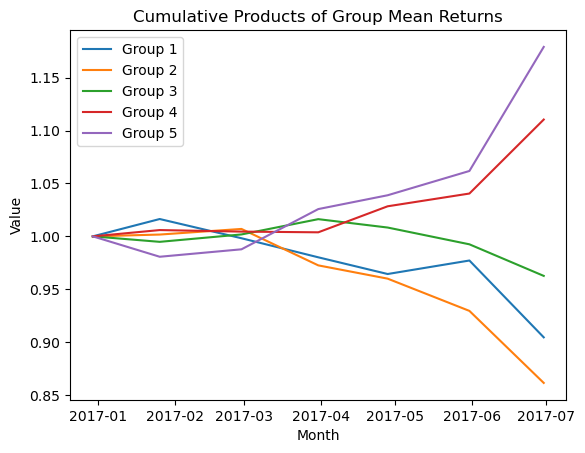

In [26]:
dates = ['2016-12-30','2017-01-26', '2017-02-28', '2017-03-31', '2017-04-28', '2017-05-31', '2017-06-30']

# Convert dates from strings to datetime objects
dates = [datetime.strptime(date, '%Y-%m-%d') for date in dates]

for i, result in enumerate(all_results):
    plt.plot(dates, result, label=f'Group {i+1}')
plt.xlabel('Month')  # Replace 'Index' with a suitable label
plt.ylabel('Value')  # Replace 'Value' with a suitable label
plt.title('Cumulative Products of Group Mean Returns')  # Customize title as per your needs
plt.legend()  # This will add a legend with labels as 'Group 1', 'Group 2', etc.
plt.legend()
plt.show()
total_results.append(all_results)

In [27]:
total_returns.append(returns)

In [28]:
initial_df_01=df[(df['date'] >= '2014-06-30') & (df['date'] <= '2017-06-30')]

In [29]:
df_filtered_2017_hf=df[(df['date'] >= '2017-07-31') & (df['date'] <= '2017-12-29')]

In [30]:
bdf_01 = initial_df_01.drop(['symbol','date','level1_x','level2','close','score','shortName','level3\n','adjfactor','level1_y','adjed','return'], axis=1)

In [31]:
model = forward_selected(bdf_01, 'return_next_month')
 
print(model.model.formula)
print(model.params)

return_next_month ~ factor2_n + factor15_n + factor16_n + factor12_n + factor11_n + factor8_n + factor3_n + factor1_n + factor4_n + 1
Intercept     1.028449
factor2_n     0.002405
factor15_n   -0.006146
factor16_n    0.003633
factor12_n   -0.004851
factor11_n    0.002205
factor8_n     0.003379
factor3_n     0.002375
factor1_n     0.002099
factor4_n     0.003116
dtype: float64


In [32]:
sxdw_df_filtered_2017_hf = df_filtered_2017_hf[['symbol','date','factor2_n', 'factor15_n', 'factor16_n', 'factor12_n' ,'factor11_n','return_next_month']]

In [33]:
sxdw_df_filtered_2017_hf['factor15_n']=sxdw_df_filtered_2017_hf['factor15_n']*-1

/var/folders/2h/vnyl97gs1ls1s34tmwc5gfdw0000gn/T/ipykernel_59667/491045039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sxdw_df_filtered_2017_hf['factor15_n']=sxdw_df_filtered_2017_hf['factor15_n']*-1


In [34]:
sxdw_monthly_return = sxdw_df_filtered_2017_hf.groupby('symbol')

combined_ds = pd.DataFrame()
for symbol, group in sxdw_monthly_return:
# 将当前分组添加到combined_df
    combined_ds = pd.concat([combined_ds, group])

dataframes = {}
grouped_lists = {i: [] for i in range(1, 6)}

# 创建一个列表，包含你想要排除的列的名字
excluded_columns = ['symbol', 'date', 'return_next_month','weighted']
quanzhong=[]
zhanbi=[]
for column in combined_ds.columns:
    if column not in excluded_columns:  # 检查当前列是否在排除列表中
        correlation = combined_ds[column].corr(combined_ds['return_next_month'])
        quanzhong.append(correlation)
        print(f"The IC between {column} and return_next_month is: {correlation}")
total=sum(quanzhong)
for i in quanzhong:
    zhanbi= i / total
    print(zhanbi)

The IC between factor2_n and return_next_month is: 0.10957853857259274
The IC between factor15_n and return_next_month is: 0.08492294168671191
The IC between factor16_n and return_next_month is: 0.02592626951402081
The IC between factor12_n and return_next_month is: 0.04527178643396623
The IC between factor11_n and return_next_month is: 0.08069036862988806
0.3163444922683299
0.2451657525256975
0.07484707017142266
0.13069603300144153
0.23294665203310844


In [35]:
weights = {
'factor2_n': 0.3163444922683299,
'factor15_n': 0.2451657525256975,
'factor16_n': 0.07484707017142266,
'factor12_n': 0.13069603300144153,
'factor11_n':0.23294665203310844
}

In [36]:
for column, weight in weights.items():
    combined_ds[column] = combined_ds[column] * weight

combined_ds['weighted']=combined_ds.iloc[:, 2:7].sum(axis=1)

In [200]:
grouped = combined_ds.groupby('date')
for group_name, group in grouped:
    quantiles = np.linspace(0, 1, 6)
    bins = group['weighted'].quantile(quantiles).values
    
    new_groups = pd.cut(group['weighted'], bins=bins, labels=range(1, 6), include_lowest=True)

    for label in range(1, 6):
        grouped_lists[label].append(group[new_groups == label])


zzz=1
baseline_returns=[]
for name, group in grouped:
    dataframes[name] = group
    zzz=zzz+1
    baseline_returns.append(1-group['return_next_month'].mean())

grouped_mean_returns = {}

for key, value in grouped_lists.items():
    mean_returns = [df['return_next_month'].mean() for df in value if not df.empty]  # 排除空的DataFrame
    
    grouped_mean_returns[key] = mean_returns

all_results = []
returns = []

for key, value in grouped_mean_returns.items():
    result = [1]
    group_rt = [0]
    
    for j, baseline in zip(value, baseline_returns):
        result.append(result[-1] * (j + baseline))
        group_rt.append(j) 
    
    all_results.append(result)
    returns.append(group_rt)

avg_bs=sum(baseline_returns)/len(baseline_returns)

shortlong=[]
for i in range(len(returns[0])):
    s_l_rt=-returns[0][i]+returns[4][i]
    shortlong.append(s_l_rt)

slcount=0
for i in range(len(shortlong)):
    if shortlong[i]>0:
        slcount = slcount +1

count = 0
sl = []
for i in range(len(all_results)):
    for j in range(len(all_results[i])):
        if all_results[i][j]-1 > 0:
            count = count + 1
    sl.append(count)
    count = 0  

for i in sl:
    print("Win Rate:",(i/len(shortlong)*100),"%")

slmonthly_rt=sum(shortlong)/len(shortlong)
slmy_array = np.array(shortlong)
slstd_dev_returns = slmy_array.std()
slyearly_rt=(slmonthly_rt+1)**12-1

for i in range(0,5):
    monthly_rt=(all_results[i][5]-1)/6
    print(monthly_rt)
    monthly_rtsp=sum(all_results[i])/len(all_results[i])-1
    my_array = np.array(all_results)
    std_dev_returns = my_array.std()
    yearly_rt=(monthly_rt+1)**6-1
    print("group",i+1,"Sharpe ratio：",((monthly_rt+avg_bs)/std_dev_returns)*sqrt(6))
    print("group",i+1,"Half year return：",(yearly_rt)*100,"%")

Win Rate: 14.285714285714285 %
Win Rate: 28.57142857142857 %
Win Rate: 42.857142857142854 %
Win Rate: 85.71428571428571 %
Win Rate: 57.14285714285714 %
-0.0038068623884107144
group 1 Sharpe ratio： -0.8506631445924097
group 1 Half year return： -2.2624891562552096 %
-0.011745486913197434
group 2 Sharpe ratio： -1.227368202634421
group 2 Half year return： -6.843569771216751 %
-0.0012546338635235725
group 3 Sharpe ratio： -0.7295543313965976
group 3 Half year return： -0.7504231050557308 %
0.006746768501453134
group 4 Sharpe ratio： -0.3498703278384352
group 4 Half year return： 4.116956755802326 %
0.010302947821710373
group 5 Sharpe ratio： -0.18112185849559345
group 5 Half year return： 6.343199096438057 %


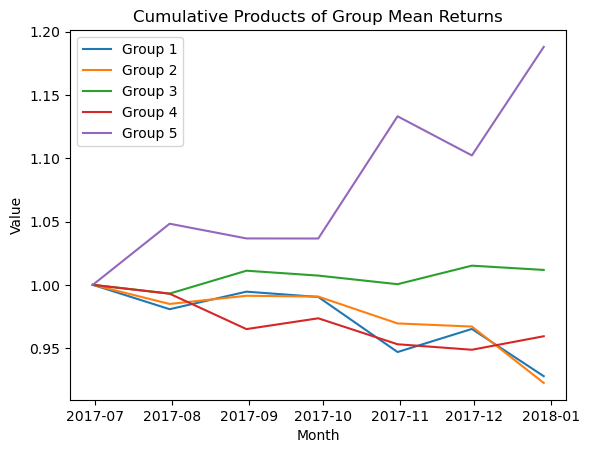

In [38]:
dates = ['2017-06-30', '2017-07-31', '2017-08-31',
       '2017-09-29', '2017-10-31', '2017-11-30', '2017-12-29']

# Convert dates from strings to datetime objects
dates = [datetime.strptime(date, '%Y-%m-%d') for date in dates]

for i, result in enumerate(all_results):
    plt.plot(dates, result, label=f'Group {i+1}')
plt.xlabel('Month')  # Replace 'Index' with a suitable label
plt.ylabel('Value')  # Replace 'Value' with a suitable label
plt.title('Cumulative Products of Group Mean Returns')  # Customize title as per your needs
plt.legend()  # This will add a legend with labels as 'Group 1', 'Group 2', etc.
plt.legend()
plt.show()
total_results.append(all_results)

In [39]:
total_returns.append(returns)

In [40]:
initial_df_02=df[(df['date'] >= '2014-12-31') & (df['date'] <= '2017-12-29')]

df_filtered_2018_h=df[(df['date'] >= '2018-01-31') & (df['date'] <= '2018-06-29')]

bdf_01 = initial_df_02.drop(['symbol','date','level1_x','level2','close','score','shortName','level3\n','adjfactor','level1_y','adjed','return'], axis=1)

model = forward_selected(bdf_01, 'return_next_month')
 
print(model.model.formula)
print(model.params)

return_next_month ~ factor13_n + factor16_n + factor4_n + factor15_n + factor14_n + factor12_n + factor8_n + factor9_n + 1
Intercept     1.014898
factor13_n   -0.007410
factor16_n    0.005145
factor4_n     0.004918
factor15_n   -0.005613
factor14_n    0.004283
factor12_n   -0.003319
factor8_n     0.002227
factor9_n     0.002090
dtype: float64


In [41]:
sxdw_df_filtered_2018_h = df_filtered_2018_h[['symbol','date','factor13_n', 'factor16_n', 'factor5_n', 'factor15_n' ,'factor14_n','return_next_month']]

In [42]:
sxdw_df_filtered_2018_h['factor14_n']=sxdw_df_filtered_2018_h['factor14_n']*-1

/var/folders/2h/vnyl97gs1ls1s34tmwc5gfdw0000gn/T/ipykernel_59667/166547062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sxdw_df_filtered_2018_h['factor14_n']=sxdw_df_filtered_2018_h['factor14_n']*-1


In [43]:
sxdw_monthly_return = sxdw_df_filtered_2018_h.groupby('symbol')

combined_ds = pd.DataFrame()
for symbol, group in sxdw_monthly_return:
    combined_ds = pd.concat([combined_ds, group])

dataframes = {}
grouped_lists = {i: [] for i in range(1, 6)}


excluded_columns = ['symbol', 'date', 'return_next_month','weighted']
quanzhong=[]
zhanbi=[]
for column in combined_ds.columns:
    if column not in excluded_columns:  
        correlation = combined_ds[column].corr(combined_ds['return_next_month'])
        quanzhong.append(correlation)
        print(f"The IC between {column} and return_next_month is: {correlation}")
total=sum(quanzhong)
for i in quanzhong:
    zhanbi= i / total
    print(zhanbi)

The IC between factor13_n and return_next_month is: 0.0061618424005499195
The IC between factor16_n and return_next_month is: 0.05549082643663608
The IC between factor5_n and return_next_month is: 0.006305039503031849
The IC between factor15_n and return_next_month is: 0.025891343857127394
The IC between factor14_n and return_next_month is: 0.0056271642555553395
0.06194287057014671
0.5578300865806406
0.0633823815164615
0.26027672523498396
0.05656793609776721


In [44]:
weights = {
'factor13_n': 0.06194287057014671,
'factor16_n': 0.5578300865806406,
'factor5_n': 0.0633823815164615,
'factor15_n': 0.26027672523498396,
'factor14_n': 0.05656793609776721,
}

In [45]:
for column, weight in weights.items():
    combined_ds[column] = combined_ds[column] * weight

combined_ds['weighted']=combined_ds.iloc[:, 2:6].sum(axis=1)

In [201]:
grouped = combined_ds.groupby('date')
for group_name, group in grouped:

    quantiles = np.linspace(0, 1, 6)

    bins = group['weighted'].quantile(quantiles).values
    
  
    new_groups = pd.cut(group['weighted'], bins=bins, labels=range(1, 6), include_lowest=True)


    for label in range(1, 6):
        grouped_lists[label].append(group[new_groups == label])


zzz=1
baseline_returns=[]
for name, group in grouped:
    dataframes[name] = group
    zzz=zzz+1
    baseline_returns.append(1-group['return_next_month'].mean())


grouped_mean_returns = {}

for key, value in grouped_lists.items():

    mean_returns = [df['return_next_month'].mean() for df in value if not df.empty]  # 排除空的DataFrame
    

    grouped_mean_returns[key] = mean_returns

all_results = []
returns = []

for key, value in grouped_mean_returns.items():
    result = [1]
    group_rt = [0]
    
    for j, baseline in zip(value, baseline_returns):
        result.append(result[-1] * (j + baseline))
        group_rt.append(j) 
    
    all_results.append(result)
    returns.append(group_rt)

avg_bs=sum(baseline_returns)/len(baseline_returns)

shortlong=[]
for i in range(len(returns[0])):
    s_l_rt=-returns[0][i]+returns[4][i]
    shortlong.append(s_l_rt)

slcount=0
for i in range(len(shortlong)):
    if shortlong[i]>0:
        slcount = slcount +1

count = 0
sl = []
for i in range(len(all_results)):
    for j in range(len(all_results[i])):
        if all_results[i][j]-1 > 0:
            count = count + 1
    sl.append(count)
    count = 0  

for i in sl:
    print("Win Rate:",(i/len(shortlong)*100),"%")

slmonthly_rt=sum(shortlong)/len(shortlong)
slmy_array = np.array(shortlong)
slstd_dev_returns = slmy_array.std()
slyearly_rt=(slmonthly_rt+1)**12-1

for i in range(0,5):
    monthly_rt=(all_results[i][5]-1)/6
    print(monthly_rt)
    monthly_rtsp=sum(all_results[i])/len(all_results[i])-1
    my_array = np.array(all_results)
    std_dev_returns = my_array.std()
    yearly_rt=(monthly_rt+1)**6-1
    print("group",i+1,"Sharpe ratio：",((monthly_rt+avg_bs)/std_dev_returns)*sqrt(6))
    print("group",i+1,"Half year return：",(yearly_rt)*100,"%")

Win Rate: 14.285714285714285 %
Win Rate: 28.57142857142857 %
Win Rate: 42.857142857142854 %
Win Rate: 85.71428571428571 %
Win Rate: 57.14285714285714 %
-0.0038068623884107144
group 1 Sharpe ratio： -0.8506631445924097
group 1 Half year return： -2.2624891562552096 %
-0.011745486913197434
group 2 Sharpe ratio： -1.227368202634421
group 2 Half year return： -6.843569771216751 %
-0.0012546338635235725
group 3 Sharpe ratio： -0.7295543313965976
group 3 Half year return： -0.7504231050557308 %
0.006746768501453134
group 4 Sharpe ratio： -0.3498703278384352
group 4 Half year return： 4.116956755802326 %
0.010302947821710373
group 5 Sharpe ratio： -0.18112185849559345
group 5 Half year return： 6.343199096438057 %


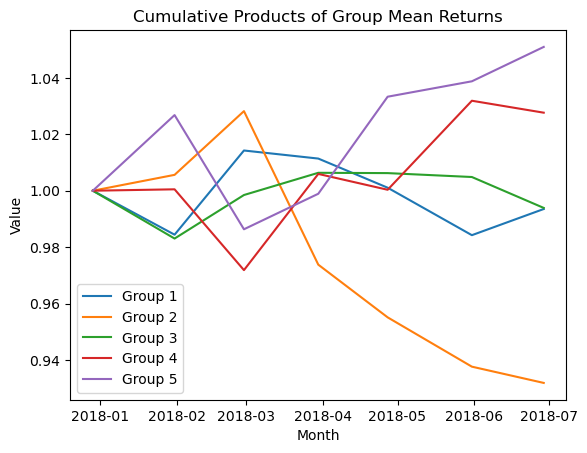

In [47]:
dates = ['2017-12-29',
       '2018-01-31', '2018-02-28', '2018-03-30', '2018-04-27',
       '2018-05-31','2018-06-29']

# Convert dates from strings to datetime objects
dates = [datetime.strptime(date, '%Y-%m-%d') for date in dates]

for i, result in enumerate(all_results):
    plt.plot(dates, result, label=f'Group {i+1}')
plt.xlabel('Month')  # Replace 'Index' with a suitable label
plt.ylabel('Value')  # Replace 'Value' with a suitable label
plt.title('Cumulative Products of Group Mean Returns')  # Customize title as per your needs
plt.legend()  # This will add a legend with labels as 'Group 1', 'Group 2', etc.
plt.legend()
plt.show()
total_results.append(all_results)

In [48]:
total_returns.append(returns)

In [49]:
initial_df_03=df[(df['date'] >= '2015-05-30') & (df['date'] <= '2018-06-29')]

df_filtered_2018_hf=df[(df['date'] >= '2018-07-31') & (df['date'] <= '2018-12-28')]

bdf_03 = initial_df_03.drop(['symbol','date','level1_x','level2','close','score','shortName','level3\n','adjfactor','level1_y','adjed','return'], axis=1)

model = forward_selected(bdf_03, 'return_next_month')
 
print(model.model.formula)
print(model.params)

return_next_month ~ factor10_n + factor16_n + factor15_n + factor14_n + factor8_n + factor1_n + factor4_n + 1
Intercept     0.991160
factor10_n    0.004521
factor16_n    0.005335
factor15_n   -0.007073
factor14_n    0.004983
factor8_n     0.003523
factor1_n     0.002954
factor4_n     0.002884
dtype: float64


In [50]:
sxdw_df_filtered_2018_hf = df_filtered_2018_hf[['symbol','date','factor10_n', 'factor16_n', 'factor15_n', 'factor14_n' ,'factor8_n','return_next_month']]

In [51]:
#sxdw_df_filtered_2018_hf['factor10_n']=sxdw_df_filtered_2018_hf['factor10_n']*-1
#sxdw_df_filtered_2018_hf['factor16_n']=sxdw_df_filtered_2018_hf['factor16_n']*-1
sxdw_df_filtered_2018_hf['factor15_n']=sxdw_df_filtered_2018_hf['factor15_n']*-1
sxdw_df_filtered_2018_hf['factor14_n']=sxdw_df_filtered_2018_hf['factor14_n']*-1
sxdw_df_filtered_2018_hf['factor8_n']=sxdw_df_filtered_2018_hf['factor8_n']*-1

/var/folders/2h/vnyl97gs1ls1s34tmwc5gfdw0000gn/T/ipykernel_59667/1720139257.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sxdw_df_filtered_2018_hf['factor15_n']=sxdw_df_filtered_2018_hf['factor15_n']*-1
/var/folders/2h/vnyl97gs1ls1s34tmwc5gfdw0000gn/T/ipykernel_59667/1720139257.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sxdw_df_filtered_2018_hf['factor14_n']=sxdw_df_filtered_2018_hf['factor14_n']*-1
/var/folders/2h/vnyl97gs1ls1s34tmwc5gfdw0000gn/T/ipykernel_59667/1720139257.py:5: SettingWithC

In [52]:
sxdw_monthly_return = sxdw_df_filtered_2018_hf.groupby('symbol')

combined_ds = pd.DataFrame()
for symbol, group in sxdw_monthly_return:
    combined_ds = pd.concat([combined_ds, group])

dataframes = {}
grouped_lists = {i: [] for i in range(1, 6)}

excluded_columns = ['symbol', 'date', 'return_next_month','weighted']
quanzhong=[]
zhanbi=[]
for column in combined_ds.columns:
    if column not in excluded_columns: 
        correlation = combined_ds[column].corr(combined_ds['return_next_month'])
        quanzhong.append(correlation)
        print(f"The IC between {column} and return_next_month is: {correlation}")
total=sum(quanzhong)
for i in quanzhong:
    zhanbi= i / total
    print(zhanbi)

The IC between factor10_n and return_next_month is: 0.02724194252424174
The IC between factor16_n and return_next_month is: 0.011486232105669484
The IC between factor15_n and return_next_month is: 0.1315664396406041
The IC between factor14_n and return_next_month is: 0.030977259246656983
The IC between factor8_n and return_next_month is: 8.817365617540432e-05
0.13528971067825374
0.05704325295365652
0.6533889988977833
0.15384014694826298
0.0004378905220433177


In [53]:
weights = {
'factor10_n':0.13528971067825374,
'factor16_n': 0.05704325295365652,
'factor15_n': 0.6533889988977833,
'factor14_n': 0.15384014694826298,
'factor8_n': 0.0004378905220433177,
}

In [54]:
for column, weight in weights.items():
    combined_ds[column] = combined_ds[column] * weight

combined_ds['weighted']=combined_ds.iloc[:, 2:7].sum(axis=1)

In [202]:
grouped = combined_ds.groupby('date')
for group_name, group in grouped:

    quantiles = np.linspace(0, 1, 6)
  
    bins = group['weighted'].quantile(quantiles).values
    
    new_groups = pd.cut(group['weighted'], bins=bins, labels=range(1, 6), include_lowest=True)

    for label in range(1, 6):
        grouped_lists[label].append(group[new_groups == label])


zzz=1
baseline_returns=[]
for name, group in grouped:
    dataframes[name] = group
    zzz=zzz+1
    baseline_returns.append(1-group['return_next_month'].mean())

grouped_mean_returns = {}

for key, value in grouped_lists.items():
    mean_returns = [df['return_next_month'].mean() for df in value if not df.empty]  # 排除空的DataFrame
    
    grouped_mean_returns[key] = mean_returns

all_results = []
returns = []

for key, value in grouped_mean_returns.items():
    result = [1]
    group_rt = [0]
    
    for j, baseline in zip(value, baseline_returns):
        result.append(result[-1] * (j + baseline))
        group_rt.append(j) 
    
    all_results.append(result)
    returns.append(group_rt)

avg_bs=sum(baseline_returns)/len(baseline_returns)

shortlong=[]
for i in range(len(returns[0])):
    s_l_rt=-returns[0][i]+returns[4][i]
    shortlong.append(s_l_rt)

slcount=0
for i in range(len(shortlong)):
    if shortlong[i]>0:
        slcount = slcount +1

count = 0
sl = []
for i in range(len(all_results)):
    for j in range(len(all_results[i])):
        if all_results[i][j]-1 > 0:
            count = count + 1
    sl.append(count)
    count = 0 

for i in sl:
    print("Win Rate:",(i/len(shortlong)*100),"%")

slmonthly_rt=sum(shortlong)/len(shortlong)
slmy_array = np.array(shortlong)
slstd_dev_returns = slmy_array.std()
slyearly_rt=(slmonthly_rt+1)**12-1

for i in range(0,5):
    monthly_rt=(all_results[i][5]-1)/6
    print(monthly_rt)
    monthly_rtsp=sum(all_results[i])/len(all_results[i])-1
    my_array = np.array(all_results)
    std_dev_returns = my_array.std()
    yearly_rt=(monthly_rt+1)**6-1
    print("group",i+1,"Sharpe ratio：",((monthly_rt+avg_bs)/std_dev_returns)*sqrt(6))
    print("group",i+1,"Half year return：",(yearly_rt)*100,"%")

Win Rate: 14.285714285714285 %
Win Rate: 28.57142857142857 %
Win Rate: 42.857142857142854 %
Win Rate: 85.71428571428571 %
Win Rate: 57.14285714285714 %
-0.0038068623884107144
group 1 Sharpe ratio： -0.8506631445924097
group 1 Half year return： -2.2624891562552096 %
-0.011745486913197434
group 2 Sharpe ratio： -1.227368202634421
group 2 Half year return： -6.843569771216751 %
-0.0012546338635235725
group 3 Sharpe ratio： -0.7295543313965976
group 3 Half year return： -0.7504231050557308 %
0.006746768501453134
group 4 Sharpe ratio： -0.3498703278384352
group 4 Half year return： 4.116956755802326 %
0.010302947821710373
group 5 Sharpe ratio： -0.18112185849559345
group 5 Half year return： 6.343199096438057 %


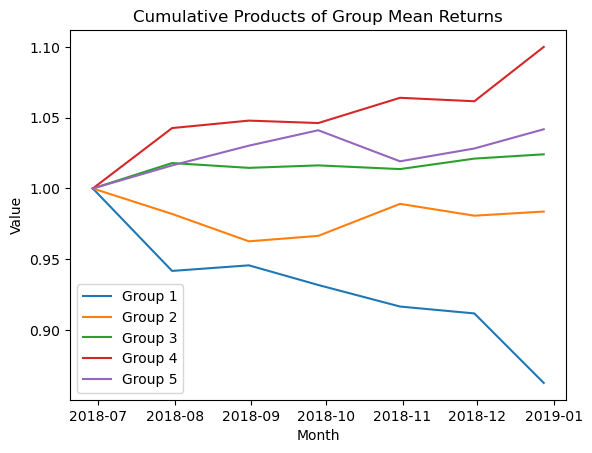

In [56]:
dates = ['2018-06-29','2018-07-31', '2018-08-31',
       '2018-09-28', '2018-10-31', '2018-11-30', '2018-12-28']

# Convert dates from strings to datetime objects
dates = [datetime.strptime(date, '%Y-%m-%d') for date in dates]

for i, result in enumerate(all_results):
    plt.plot(dates, result, label=f'Group {i+1}')
plt.xlabel('Month')  # Replace 'Index' with a suitable label
plt.ylabel('Value')  # Replace 'Value' with a suitable label
plt.title('Cumulative Products of Group Mean Returns')  # Customize title as per your needs
plt.legend()  # This will add a legend with labels as 'Group 1', 'Group 2', etc.
plt.legend()
plt.show()
total_results.append(all_results)

In [57]:
total_returns.append(returns)

In [58]:
initial_df_04=df[(df['date'] >= '2015-12-31') & (df['date'] <= '2018-12-28')]

df_filtered_2019_h=df[(df['date'] >= '2019-01-31') & (df['date'] <= '2019-06-28')]

bdf_04 = initial_df_04.drop(['symbol','date','level1_x','level2','close','score','shortName','level3\n','adjfactor','level1_y','adjed','return'], axis=1)

model = forward_selected(bdf_04, 'return_next_month')
 
print(model.model.formula)
print(model.params)

return_next_month ~ factor11_n + factor1_n + factor14_n + factor15_n + factor16_n + factor8_n + factor7_n + factor2_n + factor4_n + 1
Intercept     0.985994
factor11_n    0.006329
factor1_n     0.006284
factor14_n    0.006100
factor15_n   -0.006817
factor16_n    0.003448
factor8_n     0.002486
factor7_n     0.001819
factor2_n    -0.002296
factor4_n     0.001753
dtype: float64


In [59]:
sxdw_df_filtered_2019_h = df_filtered_2019_h[['symbol','date','factor11_n', 'factor1_n', 'factor14_n', 'factor15_n' ,'factor16_n','return_next_month']]

In [60]:
sxdw_df_filtered_2019_h['factor14_n']=sxdw_df_filtered_2019_h['factor14_n']*-1
sxdw_df_filtered_2019_h['factor1_n']=sxdw_df_filtered_2019_h['factor1_n']*-1

/var/folders/2h/vnyl97gs1ls1s34tmwc5gfdw0000gn/T/ipykernel_59667/863864738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sxdw_df_filtered_2019_h['factor14_n']=sxdw_df_filtered_2019_h['factor14_n']*-1
/var/folders/2h/vnyl97gs1ls1s34tmwc5gfdw0000gn/T/ipykernel_59667/863864738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sxdw_df_filtered_2019_h['factor1_n']=sxdw_df_filtered_2019_h['factor1_n']*-1


In [61]:
sxdw_monthly_return = sxdw_df_filtered_2019_h.groupby('symbol')

combined_ds = pd.DataFrame()
for symbol, group in sxdw_monthly_return:
    combined_ds = pd.concat([combined_ds, group])

dataframes = {}
grouped_lists = {i: [] for i in range(1, 6)}


excluded_columns = ['symbol', 'date', 'return_next_month','weighted']
quanzhong=[]
zhanbi=[]
for column in combined_ds.columns:
    if column not in excluded_columns: 
        correlation = combined_ds[column].corr(combined_ds['return_next_month'])
        quanzhong.append(correlation)
        print(f"The IC between {column} and return_next_month is: {correlation}")
total=sum(quanzhong)
for i in quanzhong:
    zhanbi= i / total
    print(zhanbi)

The IC between factor11_n and return_next_month is: 0.06991958324935754
The IC between factor1_n and return_next_month is: 0.03146154415145234
The IC between factor14_n and return_next_month is: 0.0012327252460488695
The IC between factor15_n and return_next_month is: 0.0301903807673857
The IC between factor16_n and return_next_month is: 0.0433066924510669
0.3970201332246226
0.17864617993953397
0.006999709075356578
0.17142820991398985
0.245905767846497


In [62]:
weights = {
'factor11_n':0.3970201332246226,
'factor1_n': 0.17864617993953397,
'factor14_n': 0.006999709075356578,
'factor15_n': 0.17142820991398985,
'factor16_n': 0.245905767846497,
}

In [63]:
for column, weight in weights.items():
    combined_ds[column] = combined_ds[column] * weight

combined_ds['weighted']=combined_ds.iloc[:, 2:7].sum(axis=1)

In [203]:
grouped = combined_ds.groupby('date')
for group_name, group in grouped:
    quantiles = np.linspace(0, 1, 6)
    bins = group['weighted'].quantile(quantiles).values
    
    new_groups = pd.cut(group['weighted'], bins=bins, labels=range(1, 6), include_lowest=True)

    for label in range(1, 6):
        grouped_lists[label].append(group[new_groups == label])


zzz=1
baseline_returns=[]
for name, group in grouped:
    dataframes[name] = group
    zzz=zzz+1
    baseline_returns.append(1-group['return_next_month'].mean())

grouped_mean_returns = {}

for key, value in grouped_lists.items():
    mean_returns = [df['return_next_month'].mean() for df in value if not df.empty]  # 排除空的DataFrame
    
    grouped_mean_returns[key] = mean_returns

all_results = []
returns = []

for key, value in grouped_mean_returns.items():
    result = [1]
    group_rt = [0]
    
    for j, baseline in zip(value, baseline_returns):
        result.append(result[-1] * (j + baseline))
        group_rt.append(j) 
    
    all_results.append(result)
    returns.append(group_rt)

avg_bs=sum(baseline_returns)/len(baseline_returns)

shortlong=[]
for i in range(len(returns[0])):
    s_l_rt=-returns[0][i]+returns[4][i]
    shortlong.append(s_l_rt)

slcount=0
for i in range(len(shortlong)):
    if shortlong[i]>0:
        slcount = slcount +1

count = 0
sl = []
for i in range(len(all_results)):
    for j in range(len(all_results[i])):
        if all_results[i][j]-1 > 0:
            count = count + 1
    sl.append(count)
    count = 0 
for i in sl:
    print("Win Rate:",(i/len(shortlong)*100),"%")

slmonthly_rt=sum(shortlong)/len(shortlong)
slmy_array = np.array(shortlong)
slstd_dev_returns = slmy_array.std()
slyearly_rt=(slmonthly_rt+1)**12-1

for i in range(0,5):
    monthly_rt=(all_results[i][5]-1)/6
    print(monthly_rt)
    monthly_rtsp=sum(all_results[i])/len(all_results[i])-1
    my_array = np.array(all_results)
    std_dev_returns = my_array.std()
    yearly_rt=(monthly_rt+1)**6-1
    print("group",i+1,"Sharpe ratio：",((monthly_rt+avg_bs)/std_dev_returns)*sqrt(6))
    print("group",i+1,"Half year return：",(yearly_rt)*100,"%")

Win Rate: 14.285714285714285 %
Win Rate: 28.57142857142857 %
Win Rate: 42.857142857142854 %
Win Rate: 85.71428571428571 %
Win Rate: 57.14285714285714 %
-0.0038068623884107144
group 1 Sharpe ratio： -0.8506631445924097
group 1 Half year return： -2.2624891562552096 %
-0.011745486913197434
group 2 Sharpe ratio： -1.227368202634421
group 2 Half year return： -6.843569771216751 %
-0.0012546338635235725
group 3 Sharpe ratio： -0.7295543313965976
group 3 Half year return： -0.7504231050557308 %
0.006746768501453134
group 4 Sharpe ratio： -0.3498703278384352
group 4 Half year return： 4.116956755802326 %
0.010302947821710373
group 5 Sharpe ratio： -0.18112185849559345
group 5 Half year return： 6.343199096438057 %


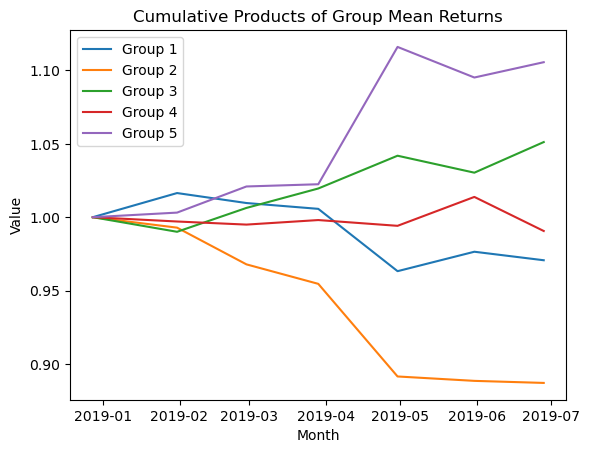

In [65]:
dates = ['2018-12-28','2019-01-31', '2019-02-28', '2019-03-29', '2019-04-30',
       '2019-05-31', '2019-06-28']

# Convert dates from strings to datetime objects
dates = [datetime.strptime(date, '%Y-%m-%d') for date in dates]

for i, result in enumerate(all_results):
    plt.plot(dates, result, label=f'Group {i+1}')
plt.xlabel('Month')  # Replace 'Index' with a suitable label
plt.ylabel('Value')  # Replace 'Value' with a suitable label
plt.title('Cumulative Products of Group Mean Returns')  # Customize title as per your needs
plt.legend()  # This will add a legend with labels as 'Group 1', 'Group 2', etc.
plt.legend()
plt.show()
total_results.append(all_results)

In [66]:
total_returns.append(returns)

In [67]:
initial_df_05=df[(df['date'] >= '2016-06-30') & (df['date'] <= '2019-06-28')]

df_filtered_2019_hf=df[(df['date'] >= '2019-07-31') & (df['date'] <= '2019-12-31')]

bdf_05 = initial_df_05.drop(['symbol','date','level1_x','level2','close','score','shortName','level3\n','adjfactor','level1_y','adjed','return'], axis=1)

model = forward_selected(bdf_05, 'return_next_month')
 
print(model.model.formula)
print(model.params)

return_next_month ~ factor1_n + factor11_n + factor13_n + factor14_n + factor8_n + factor2_n + factor3_n + factor16_n + factor4_n + factor12_n + factor15_n + 1
Intercept     0.993209
factor1_n     0.006342
factor11_n    0.005142
factor13_n   -0.005771
factor14_n    0.005063
factor8_n     0.003047
factor2_n    -0.004142
factor3_n     0.003332
factor16_n    0.002143
factor4_n     0.002653
factor12_n    0.001958
factor15_n   -0.002481
dtype: float64


In [68]:
sxdw_df_filtered_2019_hf = df_filtered_2019_hf[['symbol','date','factor1_n', 'factor11_n', 'factor13_n', 'factor14_n' ,'factor8_n','return_next_month']]

In [69]:
sxdw_df_filtered_2019_hf['factor1_n']=sxdw_df_filtered_2019_hf['factor1_n']*-1
sxdw_df_filtered_2019_hf['factor11_n']=sxdw_df_filtered_2019_hf['factor11_n']*-1

/var/folders/2h/vnyl97gs1ls1s34tmwc5gfdw0000gn/T/ipykernel_59667/398319976.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sxdw_df_filtered_2019_hf['factor1_n']=sxdw_df_filtered_2019_hf['factor1_n']*-1
/var/folders/2h/vnyl97gs1ls1s34tmwc5gfdw0000gn/T/ipykernel_59667/398319976.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sxdw_df_filtered_2019_hf['factor11_n']=sxdw_df_filtered_2019_hf['factor11_n']*-1


In [70]:
sxdw_monthly_return = sxdw_df_filtered_2019_hf.groupby('symbol')

combined_ds = pd.DataFrame()
for symbol, group in sxdw_monthly_return:
    combined_ds = pd.concat([combined_ds, group])

dataframes = {}
grouped_lists = {i: [] for i in range(1, 6)}

excluded_columns = ['symbol', 'date', 'return_next_month','weighted']
quanzhong=[]
zhanbi=[]
for column in combined_ds.columns:
    if column not in excluded_columns: 
        correlation = combined_ds[column].corr(combined_ds['return_next_month'])
        quanzhong.append(correlation)
        print(f"The IC between {column} and return_next_month is: {correlation}")
total=sum(quanzhong)
for i in quanzhong:
    zhanbi= i / total
    print(zhanbi)

The IC between factor1_n and return_next_month is: 0.03349490155385824
The IC between factor11_n and return_next_month is: 0.02308965595724685
The IC between factor13_n and return_next_month is: 0.005891305739107249
The IC between factor14_n and return_next_month is: 0.0071496488260358515
The IC between factor8_n and return_next_month is: 0.004666409125386982
0.4508552344870712
0.31079632325807516
0.07929941296197872
0.09623723159118529
0.06281179770168972


In [71]:
weights = {
'factor1_n':0.4508552344870712,
'factor11_n': 0.31079632325807516,
'factor13_n': 0.07929941296197872,
'factor14_n': 0.09623723159118529,
'factor8_n': 0.06281179770168972,
}

In [72]:
for column, weight in weights.items():
    combined_ds[column] = combined_ds[column] * weight

combined_ds['weighted']=combined_ds.iloc[:, 2:7].sum(axis=1)

In [204]:
grouped = combined_ds.groupby('date')
for group_name, group in grouped:
    quantiles = np.linspace(0, 1, 6)
    bins = group['weighted'].quantile(quantiles).values
    
    new_groups = pd.cut(group['weighted'], bins=bins, labels=range(1, 6), include_lowest=True)

    for label in range(1, 6):
        grouped_lists[label].append(group[new_groups == label])


zzz=1
baseline_returns=[]
for name, group in grouped:
    dataframes[name] = group
    zzz=zzz+1
    baseline_returns.append(1-group['return_next_month'].mean())

grouped_mean_returns = {}

for key, value in grouped_lists.items():
    mean_returns = [df['return_next_month'].mean() for df in value if not df.empty]  # 排除空的DataFrame
    
    grouped_mean_returns[key] = mean_returns

all_results = []
returns = []

for key, value in grouped_mean_returns.items():
    result = [1]
    group_rt = [0]
    
    for j, baseline in zip(value, baseline_returns):
        result.append(result[-1] * (j + baseline))
        group_rt.append(j) 
    
    all_results.append(result)
    returns.append(group_rt)

avg_bs=sum(baseline_returns)/len(baseline_returns)

shortlong=[]
for i in range(len(returns[0])):
    s_l_rt=-returns[0][i]+returns[4][i]
    shortlong.append(s_l_rt)

slcount=0
for i in range(len(shortlong)):
    if shortlong[i]>0:
        slcount = slcount +1

count = 0
sl = []
for i in range(len(all_results)):
    for j in range(len(all_results[i])):
        if all_results[i][j]-1 > 0:
            count = count + 1
    sl.append(count)
    count = 0  

for i in sl:
    print("Win Rate:",(i/len(shortlong)*100),"%")

slmonthly_rt=sum(shortlong)/len(shortlong)
slmy_array = np.array(shortlong)
slstd_dev_returns = slmy_array.std()
slyearly_rt=(slmonthly_rt+1)**12-1

for i in range(0,5):
    monthly_rt=(all_results[i][5]-1)/6
    print(monthly_rt)
    monthly_rtsp=sum(all_results[i])/len(all_results[i])-1
    my_array = np.array(all_results)
    std_dev_returns = my_array.std()
    yearly_rt=(monthly_rt+1)**6-1
    print("group",i+1,"Sharpe ratio：",((monthly_rt+avg_bs)/std_dev_returns)*sqrt(6))
    print("group",i+1,"Half year return：",(yearly_rt)*100,"%")

Win Rate: 14.285714285714285 %
Win Rate: 28.57142857142857 %
Win Rate: 42.857142857142854 %
Win Rate: 85.71428571428571 %
Win Rate: 57.14285714285714 %
-0.0038068623884107144
group 1 Sharpe ratio： -0.8506631445924097
group 1 Half year return： -2.2624891562552096 %
-0.011745486913197434
group 2 Sharpe ratio： -1.227368202634421
group 2 Half year return： -6.843569771216751 %
-0.0012546338635235725
group 3 Sharpe ratio： -0.7295543313965976
group 3 Half year return： -0.7504231050557308 %
0.006746768501453134
group 4 Sharpe ratio： -0.3498703278384352
group 4 Half year return： 4.116956755802326 %
0.010302947821710373
group 5 Sharpe ratio： -0.18112185849559345
group 5 Half year return： 6.343199096438057 %


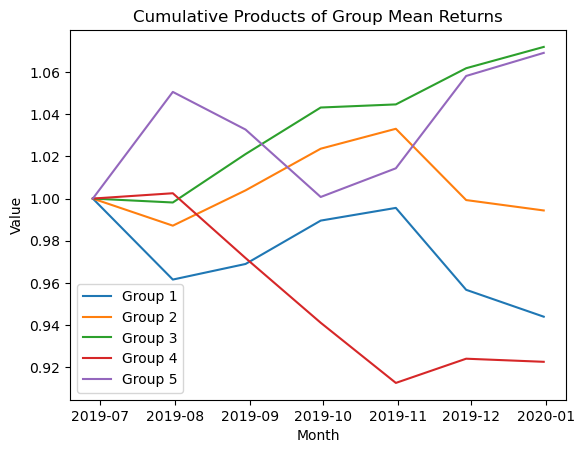

In [74]:
dates = ['2019-06-28', '2019-07-31', '2019-08-30',
       '2019-09-30', '2019-10-31', '2019-11-29', '2019-12-31']

# Convert dates from strings to datetime objects
dates = [datetime.strptime(date, '%Y-%m-%d') for date in dates]

for i, result in enumerate(all_results):
    plt.plot(dates, result, label=f'Group {i+1}')
plt.xlabel('Month')  # Replace 'Index' with a suitable label
plt.ylabel('Value')  # Replace 'Value' with a suitable label
plt.title('Cumulative Products of Group Mean Returns')  # Customize title as per your needs
plt.legend()  # This will add a legend with labels as 'Group 1', 'Group 2', etc.
plt.legend()
plt.show()
total_results.append(all_results)

In [75]:
total_returns.append(returns)

In [76]:
initial_df_06=df[(df['date'] >= '2016-12-30') & (df['date'] <= '2019-12-31')]

df_filtered_2020_h=df[(df['date'] >= '2020-01-23') & (df['date'] <= '2020-06-30')]

bdf_06 = initial_df_06.drop(['symbol','date','level1_x','level2','close','score','shortName','level3\n','adjfactor','level1_y','adjed','return'], axis=1)

model = forward_selected(bdf_06, 'return_next_month')
 
print(model.model.formula)
print(model.params)

return_next_month ~ factor10_n + factor13_n + factor8_n + factor1_n + factor14_n + factor3_n + factor12_n + factor16_n + 1
Intercept     0.990612
factor10_n    0.005319
factor13_n   -0.006411
factor8_n     0.004643
factor1_n     0.003123
factor14_n    0.004097
factor3_n     0.003062
factor12_n    0.002631
factor16_n    0.001859
dtype: float64


In [77]:
sxdw_df_filtered_2020_h = df_filtered_2020_h[['symbol','date','factor10_n', 'factor13_n', 'factor8_n', 'factor1_n' ,'factor14_n','return_next_month']]

In [78]:
sxdw_df_filtered_2020_h['factor1_n']=sxdw_df_filtered_2020_h['factor1_n']*-1

/var/folders/2h/vnyl97gs1ls1s34tmwc5gfdw0000gn/T/ipykernel_59667/1324267734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sxdw_df_filtered_2020_h['factor1_n']=sxdw_df_filtered_2020_h['factor1_n']*-1


In [79]:
sxdw_monthly_return = sxdw_df_filtered_2020_h.groupby('symbol')

combined_ds = pd.DataFrame()
for symbol, group in sxdw_monthly_return:
    combined_ds = pd.concat([combined_ds, group])

dataframes = {}
grouped_lists = {i: [] for i in range(1, 6)}

excluded_columns = ['symbol', 'date', 'return_next_month','weighted']
quanzhong=[]
zhanbi=[]
for column in combined_ds.columns:
    if column not in excluded_columns: 
        correlation = combined_ds[column].corr(combined_ds['return_next_month'])
        quanzhong.append(correlation)
        print(f"The IC between {column} and return_next_month is: {correlation}")
total=sum(quanzhong)
for i in quanzhong:
    zhanbi= i / total
    print(zhanbi)

The IC between factor10_n and return_next_month is: 0.11845928123351306
The IC between factor13_n and return_next_month is: 0.021230849414332568
The IC between factor8_n and return_next_month is: 0.1194605494662941
The IC between factor1_n and return_next_month is: 0.04530445710503871
The IC between factor14_n and return_next_month is: 0.04629092181035996
0.33773517387842383
0.06053054301757556
0.34058985522695107
0.12916597617772052
0.1319784516993291


In [80]:
weights = {
'factor10_n':0.33773517387842383,
'factor13_n': 0.06053054301757556,
'factor8_n': 0.34058985522695107,
'factor1_n': 0.12916597617772052,
'factor14_n': 0.1319784516993291,
}

In [81]:
for column, weight in weights.items():
    combined_ds[column] = combined_ds[column] * weight

combined_ds['weighted']=combined_ds.iloc[:, 2:7].sum(axis=1)

In [205]:
grouped = combined_ds.groupby('date')
for group_name, group in grouped:
    quantiles = np.linspace(0, 1, 6)
    bins = group['weighted'].quantile(quantiles).values
    
    new_groups = pd.cut(group['weighted'], bins=bins, labels=range(1, 6), include_lowest=True)

    for label in range(1, 6):
        grouped_lists[label].append(group[new_groups == label])


zzz=1
baseline_returns=[]
for name, group in grouped:
    dataframes[name] = group
    zzz=zzz+1
    baseline_returns.append(1-group['return_next_month'].mean())

grouped_mean_returns = {}

for key, value in grouped_lists.items():
    mean_returns = [df['return_next_month'].mean() for df in value if not df.empty]  # 排除空的DataFrame
    
    grouped_mean_returns[key] = mean_returns

all_results = []
returns = []

for key, value in grouped_mean_returns.items():
    result = [1]
    group_rt = [0]
    
    for j, baseline in zip(value, baseline_returns):
        result.append(result[-1] * (j + baseline))
        group_rt.append(j) 
    
    all_results.append(result)
    returns.append(group_rt)

avg_bs=sum(baseline_returns)/len(baseline_returns)

shortlong=[]
for i in range(len(returns[0])):
    s_l_rt=-returns[0][i]+returns[4][i]
    shortlong.append(s_l_rt)

slcount=0
for i in range(len(shortlong)):
    if shortlong[i]>0:
        slcount = slcount +1

count = 0
sl = []
for i in range(len(all_results)):
    for j in range(len(all_results[i])):
        if all_results[i][j]-1 > 0:
            count = count + 1
    sl.append(count)
    count = 0  

for i in sl:
    print("Win Rate:",(i/len(shortlong)*100),"%")

slmonthly_rt=sum(shortlong)/len(shortlong)
slmy_array = np.array(shortlong)
slstd_dev_returns = slmy_array.std()
slyearly_rt=(slmonthly_rt+1)**12-1

for i in range(0,5):
    monthly_rt=(all_results[i][5]-1)/6
    print(monthly_rt)
    monthly_rtsp=sum(all_results[i])/len(all_results[i])-1
    my_array = np.array(all_results)
    std_dev_returns = my_array.std()
    yearly_rt=(monthly_rt+1)**6-1
    print("group",i+1,"Sharpe ratio：",((monthly_rt+avg_bs)/std_dev_returns)*sqrt(6))
    print("group",i+1,"Half year return：",(yearly_rt)*100,"%")

Win Rate: 14.285714285714285 %
Win Rate: 28.57142857142857 %
Win Rate: 42.857142857142854 %
Win Rate: 85.71428571428571 %
Win Rate: 57.14285714285714 %
-0.0038068623884107144
group 1 Sharpe ratio： -0.8506631445924097
group 1 Half year return： -2.2624891562552096 %
-0.011745486913197434
group 2 Sharpe ratio： -1.227368202634421
group 2 Half year return： -6.843569771216751 %
-0.0012546338635235725
group 3 Sharpe ratio： -0.7295543313965976
group 3 Half year return： -0.7504231050557308 %
0.006746768501453134
group 4 Sharpe ratio： -0.3498703278384352
group 4 Half year return： 4.116956755802326 %
0.010302947821710373
group 5 Sharpe ratio： -0.18112185849559345
group 5 Half year return： 6.343199096438057 %


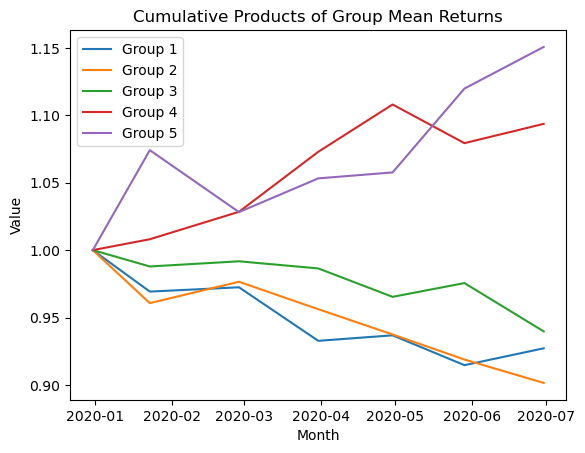

In [83]:
dates = ['2019-12-31',
       '2020-01-23', '2020-02-28', '2020-03-31', '2020-04-30',
       '2020-05-29', '2020-06-30']

# Convert dates from strings to datetime objects
dates = [datetime.strptime(date, '%Y-%m-%d') for date in dates]

for i, result in enumerate(all_results):
    plt.plot(dates, result, label=f'Group {i+1}')
plt.xlabel('Month')  # Replace 'Index' with a suitable label
plt.ylabel('Value')  # Replace 'Value' with a suitable label
plt.title('Cumulative Products of Group Mean Returns')  # Customize title as per your needs
plt.legend()  # This will add a legend with labels as 'Group 1', 'Group 2', etc.
plt.legend()
plt.show()
total_results.append(all_results)

In [84]:
total_returns.append(returns)

In [85]:
initial_df_07=df[(df['date'] >= '2017-06-30') & (df['date'] <= '2020-06-30')]

df_filtered_2020_hf=df[(df['date'] >= '2020-07-31') & (df['date'] <= '2020-12-31')]

bdf_07 = initial_df_07.drop(['symbol','date','level1_x','level2','close','score','shortName','level3\n','adjfactor','level1_y','adjed','return'], axis=1)

model = forward_selected(bdf_07, 'return_next_month')
 
print(model.model.formula)
print(model.params)

return_next_month ~ factor10_n + factor8_n + factor13_n + factor14_n + factor16_n + factor3_n + factor12_n + factor11_n + factor6_n + factor1_n + 1
Intercept     0.996373
factor10_n    0.001483
factor8_n     0.005772
factor13_n   -0.006747
factor14_n    0.003582
factor16_n    0.002360
factor3_n     0.002056
factor12_n    0.001883
factor11_n    0.004394
factor6_n    -0.002145
factor1_n     0.001754
dtype: float64


In [86]:
sxdw_df_filtered_2020_hf = df_filtered_2020_hf[['symbol','date','factor10_n', 'factor8_n', 'factor13_n', 'factor14_n' ,'factor16_n','return_next_month']]

In [87]:
sxdw_df_filtered_2020_hf['factor8_n']=sxdw_df_filtered_2020_hf['factor8_n']*-1
sxdw_df_filtered_2020_hf['factor13_n']=sxdw_df_filtered_2020_hf['factor13_n']*-1
sxdw_df_filtered_2020_hf['factor14_n']=sxdw_df_filtered_2020_hf['factor14_n']*-1

/var/folders/2h/vnyl97gs1ls1s34tmwc5gfdw0000gn/T/ipykernel_59667/2203548000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sxdw_df_filtered_2020_hf['factor8_n']=sxdw_df_filtered_2020_hf['factor8_n']*-1
/var/folders/2h/vnyl97gs1ls1s34tmwc5gfdw0000gn/T/ipykernel_59667/2203548000.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sxdw_df_filtered_2020_hf['factor13_n']=sxdw_df_filtered_2020_hf['factor13_n']*-1
/var/folders/2h/vnyl97gs1ls1s34tmwc5gfdw0000gn/T/ipykernel_59667/2203548000.py:3: SettingWithCop

In [88]:
sxdw_monthly_return = sxdw_df_filtered_2020_hf.groupby('symbol')

combined_ds = pd.DataFrame()
for symbol, group in sxdw_monthly_return:
    combined_ds = pd.concat([combined_ds, group])

dataframes = {}
grouped_lists = {i: [] for i in range(1, 6)}

excluded_columns = ['symbol', 'date', 'return_next_month','weighted']
quanzhong=[]
zhanbi=[]
for column in combined_ds.columns:
    if column not in excluded_columns:  
        correlation = combined_ds[column].corr(combined_ds['return_next_month'])
        quanzhong.append(correlation)
        print(f"The IC between {column} and return_next_month is: {correlation}")
total=sum(quanzhong)
for i in quanzhong:
    zhanbi= i / total
    print(zhanbi)

The IC between factor10_n and return_next_month is: 0.0426457832789756
The IC between factor8_n and return_next_month is: 0.045269737282452344
The IC between factor13_n and return_next_month is: 0.08431859947081505
The IC between factor14_n and return_next_month is: 0.05641414990910206
The IC between factor16_n and return_next_month is: 0.07163873757862706
0.14201674468429748
0.1507548983098826
0.28079336554448503
0.18786743514152857
0.23856755631980633


In [89]:
weights = {
'factor10_n':0.14201674468429748,
'factor8_n': 0.1507548983098826,
'factor13_n': 0.28079336554448503,
'factor14_n': 0.18786743514152857,
'factor16_n': 0.23856755631980633,
}

In [90]:
for column, weight in weights.items():
    combined_ds[column] = combined_ds[column] * weight

combined_ds['weighted']=combined_ds.iloc[:, 2:7].sum(axis=1)

In [206]:
grouped = combined_ds.groupby('date')
for group_name, group in grouped:
    quantiles = np.linspace(0, 1, 6)
    bins = group['weighted'].quantile(quantiles).values
    
    new_groups = pd.cut(group['weighted'], bins=bins, labels=range(1, 6), include_lowest=True)

    for label in range(1, 6):
        grouped_lists[label].append(group[new_groups == label])


zzz=1
baseline_returns=[]
for name, group in grouped:
    dataframes[name] = group
    zzz=zzz+1
    baseline_returns.append(1-group['return_next_month'].mean())

grouped_mean_returns = {}

for key, value in grouped_lists.items():
    mean_returns = [df['return_next_month'].mean() for df in value if not df.empty]  # 排除空的DataFrame
    
    grouped_mean_returns[key] = mean_returns

all_results = []
returns = []

for key, value in grouped_mean_returns.items():
    result = [1]
    group_rt = [0]
    
    for j, baseline in zip(value, baseline_returns):
        result.append(result[-1] * (j + baseline))
        group_rt.append(j) 
    
    all_results.append(result)
    returns.append(group_rt)

avg_bs=sum(baseline_returns)/len(baseline_returns)

shortlong=[]
for i in range(len(returns[0])):
    s_l_rt=-returns[0][i]+returns[4][i]
    shortlong.append(s_l_rt)

slcount=0
for i in range(len(shortlong)):
    if shortlong[i]>0:
        slcount = slcount +1

count = 0
sl = []
for i in range(len(all_results)):
    for j in range(len(all_results[i])):
        if all_results[i][j]-1 > 0:
            count = count + 1
    sl.append(count)
    count = 0 

for i in sl:
    print("Win Rate:",(i/len(shortlong)*100),"%")

slmonthly_rt=sum(shortlong)/len(shortlong)
slmy_array = np.array(shortlong)
slstd_dev_returns = slmy_array.std()
slyearly_rt=(slmonthly_rt+1)**12-1

for i in range(0,5):
    monthly_rt=(all_results[i][5]-1)/6
    print(monthly_rt)
    monthly_rtsp=sum(all_results[i])/len(all_results[i])-1
    my_array = np.array(all_results)
    std_dev_returns = my_array.std()
    yearly_rt=(monthly_rt+1)**6-1
    print("group",i+1,"Sharpe ratio：",((monthly_rt+avg_bs)/std_dev_returns)*sqrt(6))
    print("group",i+1,"Half year return：",(yearly_rt)*100,"%")

Win Rate: 14.285714285714285 %
Win Rate: 28.57142857142857 %
Win Rate: 42.857142857142854 %
Win Rate: 85.71428571428571 %
Win Rate: 57.14285714285714 %
-0.0038068623884107144
group 1 Sharpe ratio： -0.8506631445924097
group 1 Half year return： -2.2624891562552096 %
-0.011745486913197434
group 2 Sharpe ratio： -1.227368202634421
group 2 Half year return： -6.843569771216751 %
-0.0012546338635235725
group 3 Sharpe ratio： -0.7295543313965976
group 3 Half year return： -0.7504231050557308 %
0.006746768501453134
group 4 Sharpe ratio： -0.3498703278384352
group 4 Half year return： 4.116956755802326 %
0.010302947821710373
group 5 Sharpe ratio： -0.18112185849559345
group 5 Half year return： 6.343199096438057 %


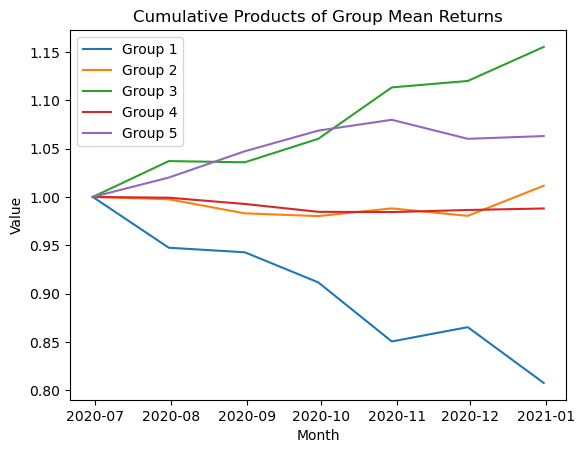

In [92]:
dates = ['2020-06-30', '2020-07-31', '2020-08-31',
       '2020-09-30', '2020-10-30', '2020-11-30', '2020-12-31']

# Convert dates from strings to datetime objects
dates = [datetime.strptime(date, '%Y-%m-%d') for date in dates]

for i, result in enumerate(all_results):
    plt.plot(dates, result, label=f'Group {i+1}')
plt.xlabel('Month')  # Replace 'Index' with a suitable label
plt.ylabel('Value')  # Replace 'Value' with a suitable label
plt.title('Cumulative Products of Group Mean Returns')  # Customize title as per your needs
plt.legend()  # This will add a legend with labels as 'Group 1', 'Group 2', etc.
plt.legend()
plt.show()
total_results.append(all_results)

In [93]:
total_returns.append(returns)

In [94]:
initial_df_08=df[(df['date'] >= '2017-12-29') & (df['date'] <= '2020-12-31')]

df_filtered_2021_h=df[(df['date'] >= '2021-01-29') & (df['date'] <= '2021-06-30')]

bdf_08 = initial_df_08.drop(['symbol','date','level1_x','level2','close','score','shortName','level3\n','adjfactor','level1_y','adjed','return'], axis=1)

model = forward_selected(bdf_08, 'return_next_month')
 
print(model.model.formula)
print(model.params)

return_next_month ~ factor11_n + factor13_n + factor16_n + factor3_n + factor2_n + factor8_n + factor10_n + 1
Intercept     0.996659
factor11_n    0.010598
factor13_n   -0.006162
factor16_n    0.004167
factor3_n     0.003994
factor2_n    -0.001713
factor8_n     0.002135
factor10_n   -0.005398
dtype: float64


In [95]:
sxdw_df_filtered_2021_h = df_filtered_2021_h[['symbol','date','factor11_n', 'factor13_n', 'factor16_n', 'factor3_n' ,'factor2_n','return_next_month']]

In [96]:
sxdw_df_filtered_2021_h['factor13_n']=sxdw_df_filtered_2021_h['factor13_n']*-1
sxdw_df_filtered_2021_h['factor3_n']=sxdw_df_filtered_2021_h['factor3_n']*-1

/var/folders/2h/vnyl97gs1ls1s34tmwc5gfdw0000gn/T/ipykernel_59667/4113727613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sxdw_df_filtered_2021_h['factor13_n']=sxdw_df_filtered_2021_h['factor13_n']*-1
/var/folders/2h/vnyl97gs1ls1s34tmwc5gfdw0000gn/T/ipykernel_59667/4113727613.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sxdw_df_filtered_2021_h['factor3_n']=sxdw_df_filtered_2021_h['factor3_n']*-1


In [97]:
sxdw_monthly_return = sxdw_df_filtered_2021_h.groupby('symbol')

combined_ds = pd.DataFrame()
for symbol, group in sxdw_monthly_return:
    combined_ds = pd.concat([combined_ds, group])

dataframes = {}
grouped_lists = {i: [] for i in range(1, 6)}

excluded_columns = ['symbol', 'date', 'return_next_month','weighted']
quanzhong=[]
zhanbi=[]
for column in combined_ds.columns:
    if column not in excluded_columns: 
        correlation = combined_ds[column].corr(combined_ds['return_next_month'])
        quanzhong.append(correlation)
        print(f"The IC between {column} and return_next_month is: {correlation}")
total=sum(quanzhong)
for i in quanzhong:
    zhanbi= i / total
    print(zhanbi)

The IC between factor11_n and return_next_month is: 0.08380183749010403
The IC between factor13_n and return_next_month is: 0.10227636700784844
The IC between factor16_n and return_next_month is: 0.010653906317553193
The IC between factor3_n and return_next_month is: 0.007361118132159724
The IC between factor2_n and return_next_month is: 0.002274421544778203
0.40608030032872106
0.49560271081146706
0.05162585459557431
0.035669922657908346
0.011021211606329179


In [98]:
weights = {
'factor11_n':0.40608030032872106,
'factor13_n': 0.49560271081146706,
'factor16_n': 0.05162585459557431,
'factor3_n': 0.035669922657908346,
'factor2_n': 0.011021211606329179,
}

In [99]:
for column, weight in weights.items():
    combined_ds[column] = combined_ds[column] * weight

combined_ds['weighted']=combined_ds.iloc[:, 2:7].sum(axis=1)

In [207]:
grouped = combined_ds.groupby('date')
for group_name, group in grouped:
    quantiles = np.linspace(0, 1, 6)
    bins = group['weighted'].quantile(quantiles).values
    
    new_groups = pd.cut(group['weighted'], bins=bins, labels=range(1, 6), include_lowest=True)

    for label in range(1, 6):
        grouped_lists[label].append(group[new_groups == label])


zzz=1
baseline_returns=[]
for name, group in grouped:
    dataframes[name] = group
    zzz=zzz+1
    baseline_returns.append(1-group['return_next_month'].mean())

grouped_mean_returns = {}

for key, value in grouped_lists.items():
    mean_returns = [df['return_next_month'].mean() for df in value if not df.empty]  # 排除空的DataFrame
    
    grouped_mean_returns[key] = mean_returns

all_results = []
returns = []

for key, value in grouped_mean_returns.items():
    result = [1]
    group_rt = [0]
    
    for j, baseline in zip(value, baseline_returns):
        result.append(result[-1] * (j + baseline))
        group_rt.append(j) 
    
    all_results.append(result)
    returns.append(group_rt)

avg_bs=sum(baseline_returns)/len(baseline_returns)

shortlong=[]
for i in range(len(returns[0])):
    s_l_rt=-returns[0][i]+returns[4][i]
    shortlong.append(s_l_rt)

slcount=0
for i in range(len(shortlong)):
    if shortlong[i]>0:
        slcount = slcount +1

count = 0
sl = []
for i in range(len(all_results)):
    for j in range(len(all_results[i])):
        if all_results[i][j]-1 > 0:
            count = count + 1
    sl.append(count)
    count = 0  
    
for i in sl:
    print("Win Rate:",(i/len(shortlong)*100),"%")

slmonthly_rt=sum(shortlong)/len(shortlong)
slmy_array = np.array(shortlong)
slstd_dev_returns = slmy_array.std()
slyearly_rt=(slmonthly_rt+1)**12-1

for i in range(0,5):
    monthly_rt=(all_results[i][5]-1)/6
    print(monthly_rt)
    monthly_rtsp=sum(all_results[i])/len(all_results[i])-1
    my_array = np.array(all_results)
    std_dev_returns = my_array.std()
    yearly_rt=(monthly_rt+1)**6-1
    print("group",i+1,"Sharpe ratio：",((monthly_rt+avg_bs)/std_dev_returns)*sqrt(6))
    print("group",i+1,"Half year return：",(yearly_rt)*100,"%")

Win Rate: 14.285714285714285 %
Win Rate: 28.57142857142857 %
Win Rate: 42.857142857142854 %
Win Rate: 85.71428571428571 %
Win Rate: 57.14285714285714 %
-0.0038068623884107144
group 1 Sharpe ratio： -0.8506631445924097
group 1 Half year return： -2.2624891562552096 %
-0.011745486913197434
group 2 Sharpe ratio： -1.227368202634421
group 2 Half year return： -6.843569771216751 %
-0.0012546338635235725
group 3 Sharpe ratio： -0.7295543313965976
group 3 Half year return： -0.7504231050557308 %
0.006746768501453134
group 4 Sharpe ratio： -0.3498703278384352
group 4 Half year return： 4.116956755802326 %
0.010302947821710373
group 5 Sharpe ratio： -0.18112185849559345
group 5 Half year return： 6.343199096438057 %


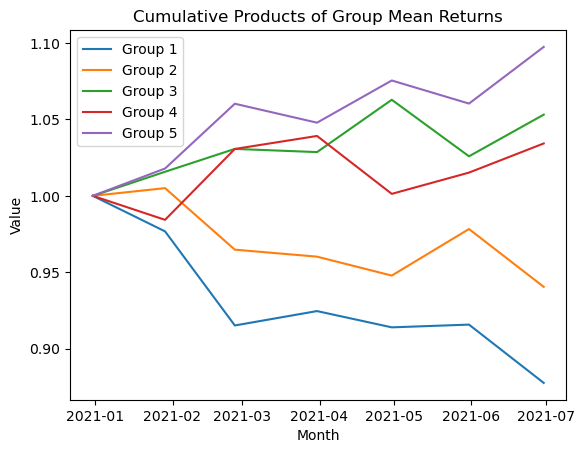

In [101]:
dates = ['2020-12-31','2021-01-29', '2021-02-26', '2021-03-31', '2021-04-30',
       '2021-05-31', '2021-06-30']

# Convert dates from strings to datetime objects
dates = [datetime.strptime(date, '%Y-%m-%d') for date in dates]

for i, result in enumerate(all_results):
    plt.plot(dates, result, label=f'Group {i+1}')
plt.xlabel('Month')  # Replace 'Index' with a suitable label
plt.ylabel('Value')  # Replace 'Value' with a suitable label
plt.title('Cumulative Products of Group Mean Returns')  # Customize title as per your needs
plt.legend()  # This will add a legend with labels as 'Group 1', 'Group 2', etc.
plt.legend()
plt.show()
total_results.append(all_results)

In [102]:
total_returns.append(returns)

In [103]:
initial_df_09=df[(df['date'] >= '2018-06-29') & (df['date'] <= '2021-06-30')]

df_filtered_2021_hf=df[(df['date'] >= '2021-07-30') & (df['date'] <= '2021-12-31')]

bdf_09 = initial_df_09.drop(['symbol','date','level1_x','level2','close','score','shortName','level3\n','adjfactor','level1_y','adjed','return'], axis=1)

model = forward_selected(bdf_09, 'return_next_month')
 
print(model.model.formula)
print(model.params)

return_next_month ~ factor11_n + factor16_n + factor13_n + factor14_n + factor10_n + factor9_n + factor2_n + factor5_n + factor6_n + 1
Intercept     1.018053
factor11_n    0.016731
factor16_n    0.005646
factor13_n   -0.003899
factor14_n   -0.002910
factor10_n   -0.010206
factor9_n     0.003417
factor2_n    -0.001705
factor5_n     0.004552
factor6_n    -0.003368
dtype: float64


In [104]:
sxdw_df_filtered_2021_hf = df_filtered_2021_hf[['symbol','date','factor11_n', 'factor16_n', 'factor13_n', 'factor14_n' ,'factor10_n','return_next_month']]

In [105]:
sxdw_df_filtered_2021_hf['factor13_n']=sxdw_df_filtered_2021_hf['factor13_n']*-1
sxdw_df_filtered_2021_hf['factor11_n']=sxdw_df_filtered_2021_hf['factor11_n']*-1
sxdw_df_filtered_2021_hf['factor10_n']=sxdw_df_filtered_2021_hf['factor10_n']*-1
sxdw_df_filtered_2021_hf['factor14_n']=sxdw_df_filtered_2021_hf['factor14_n']*-1
sxdw_df_filtered_2021_hf['factor16_n']=sxdw_df_filtered_2021_hf['factor16_n']*-1

/var/folders/2h/vnyl97gs1ls1s34tmwc5gfdw0000gn/T/ipykernel_59667/3533380675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sxdw_df_filtered_2021_hf['factor13_n']=sxdw_df_filtered_2021_hf['factor13_n']*-1
/var/folders/2h/vnyl97gs1ls1s34tmwc5gfdw0000gn/T/ipykernel_59667/3533380675.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sxdw_df_filtered_2021_hf['factor11_n']=sxdw_df_filtered_2021_hf['factor11_n']*-1
/var/folders/2h/vnyl97gs1ls1s34tmwc5gfdw0000gn/T/ipykernel_59667/3533380675.py:3: SettingWithC

In [106]:
sxdw_monthly_return = sxdw_df_filtered_2021_hf.groupby('symbol')

combined_ds = pd.DataFrame()
for symbol, group in sxdw_monthly_return:
    combined_ds = pd.concat([combined_ds, group])

dataframes = {}
grouped_lists = {i: [] for i in range(1, 6)}

excluded_columns = ['symbol', 'date', 'return_next_month','weighted']
quanzhong=[]
zhanbi=[]
for column in combined_ds.columns:
    if column not in excluded_columns:  
        correlation = combined_ds[column].corr(combined_ds['return_next_month'])
        quanzhong.append(correlation)
        print(f"The IC between {column} and return_next_month is: {correlation}")
total=sum(quanzhong)
for i in quanzhong:
    zhanbi= i / total
    print(zhanbi)

The IC between factor11_n and return_next_month is: 0.05256338490547599
The IC between factor16_n and return_next_month is: 0.12088166343204729
The IC between factor13_n and return_next_month is: 0.14452646132526836
The IC between factor14_n and return_next_month is: 0.14935463731562781
The IC between factor10_n and return_next_month is: 0.060496695099340456
0.09958527883818308
0.2290193864217774
0.27381623113608344
0.28296357301949543
0.1146155305844607


In [107]:
weights = {
'factor11_n':0.09958527883818308,
'factor16_n': 0.2290193864217774,
'factor13_n': 0.27381623113608344,
'factor14_n': 0.28296357301949543,
'factor10_n': 0.1146155305844607,
}

In [108]:
for column, weight in weights.items():
    combined_ds[column] = combined_ds[column] * weight

combined_ds['weighted']=combined_ds.iloc[:, 2:7].sum(axis=1)

In [208]:
grouped = combined_ds.groupby('date')
for group_name, group in grouped:
    quantiles = np.linspace(0, 1, 6)
    bins = group['weighted'].quantile(quantiles).values
    
    new_groups = pd.cut(group['weighted'], bins=bins, labels=range(1, 6), include_lowest=True)

    for label in range(1, 6):
        grouped_lists[label].append(group[new_groups == label])


zzz=1
baseline_returns=[]
for name, group in grouped:
    dataframes[name] = group
    zzz=zzz+1
    baseline_returns.append(1-group['return_next_month'].mean())

grouped_mean_returns = {}

for key, value in grouped_lists.items():

    mean_returns = [df['return_next_month'].mean() for df in value if not df.empty]  # 排除空的DataFrame
    

    grouped_mean_returns[key] = mean_returns

all_results = []
returns = []

for key, value in grouped_mean_returns.items():
    result = [1]
    group_rt = [0]
    
    for j, baseline in zip(value, baseline_returns):
        result.append(result[-1] * (j + baseline))
        group_rt.append(j) 
    
    all_results.append(result)
    returns.append(group_rt)

avg_bs=sum(baseline_returns)/len(baseline_returns)

shortlong=[]
for i in range(len(returns[0])):
    s_l_rt=-returns[0][i]+returns[4][i]
    shortlong.append(s_l_rt)

slcount=0
for i in range(len(shortlong)):
    if shortlong[i]>0:
        slcount = slcount +1

count = 0
sl = []
for i in range(len(all_results)):
    for j in range(len(all_results[i])):
        if all_results[i][j]-1 > 0:
            count = count + 1
    sl.append(count)
    count = 0  

for i in sl:
    print("Win Rate:",(i/len(shortlong)*100),"%")

slmonthly_rt=sum(shortlong)/len(shortlong)
slmy_array = np.array(shortlong)
slstd_dev_returns = slmy_array.std()
slyearly_rt=(slmonthly_rt+1)**12-1

for i in range(0,5):
    monthly_rt=(all_results[i][5]-1)/6
    print(monthly_rt)
    monthly_rtsp=sum(all_results[i])/len(all_results[i])-1
    my_array = np.array(all_results)
    std_dev_returns = my_array.std()
    yearly_rt=(monthly_rt+1)**6-1
    print("group",i+1,"Sharpe ratio：",((monthly_rt+avg_bs)/std_dev_returns)*sqrt(6))
    print("group",i+1,"Half year return：",(yearly_rt)*100,"%")

Win Rate: 14.285714285714285 %
Win Rate: 28.57142857142857 %
Win Rate: 42.857142857142854 %
Win Rate: 85.71428571428571 %
Win Rate: 57.14285714285714 %
-0.0038068623884107144
group 1 Sharpe ratio： -0.8506631445924097
group 1 Half year return： -2.2624891562552096 %
-0.011745486913197434
group 2 Sharpe ratio： -1.227368202634421
group 2 Half year return： -6.843569771216751 %
-0.0012546338635235725
group 3 Sharpe ratio： -0.7295543313965976
group 3 Half year return： -0.7504231050557308 %
0.006746768501453134
group 4 Sharpe ratio： -0.3498703278384352
group 4 Half year return： 4.116956755802326 %
0.010302947821710373
group 5 Sharpe ratio： -0.18112185849559345
group 5 Half year return： 6.343199096438057 %


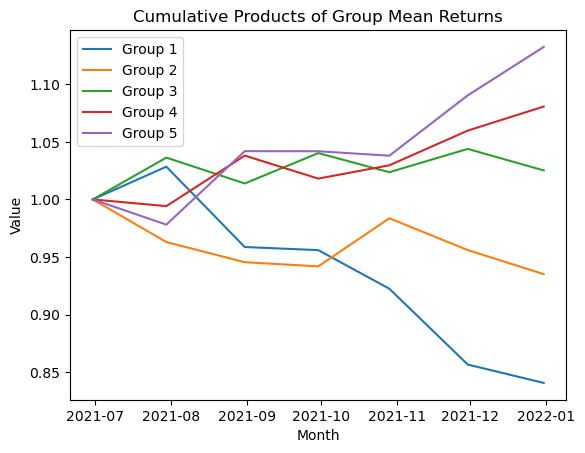

In [110]:
dates = ['2021-06-30','2021-07-30', '2021-08-31',
       '2021-09-30', '2021-10-29', '2021-11-30', '2021-12-31']

# Convert dates from strings to datetime objects
dates = [datetime.strptime(date, '%Y-%m-%d') for date in dates]

for i, result in enumerate(all_results):
    plt.plot(dates, result, label=f'Group {i+1}')
plt.xlabel('Month')  # Replace 'Index' with a suitable label
plt.ylabel('Value')  # Replace 'Value' with a suitable label
plt.title('Cumulative Products of Group Mean Returns')  # Customize title as per your needs
plt.legend()  # This will add a legend with labels as 'Group 1', 'Group 2', etc.
plt.legend()
plt.show()
total_results.append(all_results)

In [111]:
total_returns.append(returns)

In [112]:
initial_df_10=df[(df['date'] >= '2018-12-28') & (df['date'] <= '2021-12-31')]

df_filtered_2022_h=df[(df['date'] >= '2022-01-28') & (df['date'] <= '2022-06-30')]

bdf_10 = initial_df_10.drop(['symbol','date','level1_x','level2','close','score','shortName','level3\n','adjfactor','level1_y','adjed','return'], axis=1)

model = forward_selected(bdf_10, 'return_next_month')
 
print(model.model.formula)
print(model.params)

return_next_month ~ factor13_n + factor11_n + factor14_n + factor12_n + factor2_n + factor5_n + factor16_n + factor8_n + factor6_n + 1
Intercept     1.024955
factor13_n   -0.010039
factor11_n    0.008395
factor14_n   -0.005819
factor12_n    0.004945
factor2_n    -0.004325
factor5_n     0.006850
factor16_n    0.003309
factor8_n    -0.003245
factor6_n    -0.003535
dtype: float64


In [113]:
sxdw_df_filtered_2022_h = df_filtered_2022_h[['symbol','date','factor13_n', 'factor11_n', 'factor14_n', 'factor12_n' ,'factor2_n','return_next_month']]

In [114]:
sxdw_df_filtered_2022_h['factor14_n']=sxdw_df_filtered_2022_h['factor14_n']*-1

/var/folders/2h/vnyl97gs1ls1s34tmwc5gfdw0000gn/T/ipykernel_59667/1280051692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sxdw_df_filtered_2022_h['factor14_n']=sxdw_df_filtered_2022_h['factor14_n']*-1


In [115]:
sxdw_monthly_return = sxdw_df_filtered_2022_h.groupby('symbol')

combined_ds = pd.DataFrame()
for symbol, group in sxdw_monthly_return:
    combined_ds = pd.concat([combined_ds, group])

dataframes = {}
grouped_lists = {i: [] for i in range(1, 6)}

excluded_columns = ['symbol', 'date', 'return_next_month','weighted']
quanzhong=[]
zhanbi=[]
for column in combined_ds.columns:
    if column not in excluded_columns:  
        correlation = combined_ds[column].corr(combined_ds['return_next_month'])
        quanzhong.append(correlation)
        print(f"The IC between {column} and return_next_month is: {correlation}")
total=sum(quanzhong)
for i in quanzhong:
    zhanbi= i / total
    print(zhanbi)

The IC between factor13_n and return_next_month is: 0.047973585994591325
The IC between factor11_n and return_next_month is: 0.08219413142867578
The IC between factor14_n and return_next_month is: 0.008201624068038722
The IC between factor12_n and return_next_month is: 0.08359682438940252
The IC between factor2_n and return_next_month is: 0.009045648046694556
0.20766724081768112
0.3558005542283905
0.0355030503791297
0.3618725075925053
0.03915664698229336


In [116]:
weights = {
'factor13_n':0.20766724081768112,
'factor11_n': 0.3558005542283905,
'factor14_n': 0.0355030503791297,
'factor12_n': 0.3618725075925053,
'factor2_n': 0.03915664698229336,
}

In [117]:
for column, weight in weights.items():
    combined_ds[column] = combined_ds[column] * weight

combined_ds['weighted']=combined_ds.iloc[:, 2:7].sum(axis=1)

In [209]:
grouped = combined_ds.groupby('date')
for group_name, group in grouped:
    quantiles = np.linspace(0, 1, 6)
    bins = group['weighted'].quantile(quantiles).values
    
    new_groups = pd.cut(group['weighted'], bins=bins, labels=range(1, 6), include_lowest=True)

    for label in range(1, 6):
        grouped_lists[label].append(group[new_groups == label])


zzz=1
baseline_returns=[]
for name, group in grouped:
    dataframes[name] = group
    zzz=zzz+1
    baseline_returns.append(1-group['return_next_month'].mean())

grouped_mean_returns = {}

for key, value in grouped_lists.items():

    mean_returns = [df['return_next_month'].mean() for df in value if not df.empty]  # 排除空的DataFrame
    
    grouped_mean_returns[key] = mean_returns

all_results = []
returns = []

for key, value in grouped_mean_returns.items():
    result = [1]
    group_rt = [0]
    
    for j, baseline in zip(value, baseline_returns):
        result.append(result[-1] * (j + baseline))
        group_rt.append(j) 
    
    all_results.append(result)
    returns.append(group_rt)

avg_bs=sum(baseline_returns)/len(baseline_returns)

shortlong=[]
for i in range(len(returns[0])):
    s_l_rt=-returns[0][i]+returns[4][i]
    shortlong.append(s_l_rt)

slcount=0
for i in range(len(shortlong)):
    if shortlong[i]>0:
        slcount = slcount +1

count = 0
sl = []
for i in range(len(all_results)):
    for j in range(len(all_results[i])):
        if all_results[i][j]-1 > 0:
            count = count + 1
    sl.append(count)
    count = 0  

for i in sl:
    print("Win Rate:",(i/len(shortlong)*100),"%")

slmonthly_rt=sum(shortlong)/len(shortlong)
slmy_array = np.array(shortlong)
slstd_dev_returns = slmy_array.std()
slyearly_rt=(slmonthly_rt+1)**12-1

for i in range(0,5):
    monthly_rt=(all_results[i][5]-1)/6
    print(monthly_rt)
    monthly_rtsp=sum(all_results[i])/len(all_results[i])-1
    my_array = np.array(all_results)
    std_dev_returns = my_array.std()
    yearly_rt=(monthly_rt+1)**6-1
    print("group",i+1,"Sharpe ratio：",((monthly_rt+avg_bs)/std_dev_returns)*sqrt(6))
    print("group",i+1,"Half year return：",(yearly_rt)*100,"%")

Win Rate: 14.285714285714285 %
Win Rate: 28.57142857142857 %
Win Rate: 42.857142857142854 %
Win Rate: 85.71428571428571 %
Win Rate: 57.14285714285714 %
-0.0038068623884107144
group 1 Sharpe ratio： -0.8506631445924097
group 1 Half year return： -2.2624891562552096 %
-0.011745486913197434
group 2 Sharpe ratio： -1.227368202634421
group 2 Half year return： -6.843569771216751 %
-0.0012546338635235725
group 3 Sharpe ratio： -0.7295543313965976
group 3 Half year return： -0.7504231050557308 %
0.006746768501453134
group 4 Sharpe ratio： -0.3498703278384352
group 4 Half year return： 4.116956755802326 %
0.010302947821710373
group 5 Sharpe ratio： -0.18112185849559345
group 5 Half year return： 6.343199096438057 %


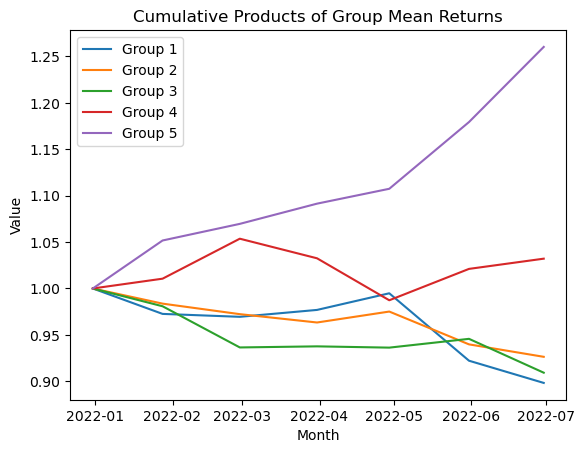

In [119]:
dates = [ '2021-12-31','2022-01-28', '2022-02-28', '2022-03-31', '2022-04-29',
       '2022-05-31', '2022-06-30']

# Convert dates from strings to datetime objects
dates = [datetime.strptime(date, '%Y-%m-%d') for date in dates]

for i, result in enumerate(all_results):
    plt.plot(dates, result, label=f'Group {i+1}')
plt.xlabel('Month')  # Replace 'Index' with a suitable label
plt.ylabel('Value')  # Replace 'Value' with a suitable label
plt.title('Cumulative Products of Group Mean Returns')  # Customize title as per your needs
plt.legend()  # This will add a legend with labels as 'Group 1', 'Group 2', etc.
plt.legend()
plt.show()
total_results.append(all_results)

In [120]:
total_returns.append(returns)

In [121]:
initial_df_11=df[(df['date'] >= '2019-06-28') & (df['date'] <= '2022-06-30')]

df_filtered_2022_hf=df[(df['date'] >= '2022-07-29') & (df['date'] <= '2022-12-30')]

bdf_11 = initial_df_11.drop(['symbol','date','level1_x','level2','close','score','shortName','level3\n','adjfactor','level1_y','adjed','return'], axis=1)

model = forward_selected(bdf_11, 'return_next_month')
 
print(model.model.formula)
print(model.params)

return_next_month ~ factor11_n + factor14_n + factor12_n + factor13_n + factor3_n + factor5_n + factor6_n + factor8_n + factor16_n + factor2_n + factor4_n + 1
Intercept     1.023364
factor11_n    0.008114
factor14_n   -0.007646
factor12_n    0.007526
factor13_n   -0.009381
factor3_n    -0.002248
factor5_n     0.006791
factor6_n    -0.004376
factor8_n    -0.002820
factor16_n    0.002214
factor2_n    -0.003280
factor4_n     0.002959
dtype: float64


In [122]:
sxdw_df_filtered_2022_hf = df_filtered_2022_hf[['symbol','date','factor11_n', 'factor14_n', 'factor12_n', 'factor13_n' ,'factor3_n','return_next_month']]

In [123]:
#sxdw_df_filtered_2022_hf['factor3_n']=sxdw_df_filtered_2022_hf['factor3_n']*-1
sxdw_df_filtered_2022_hf['factor11_n']=sxdw_df_filtered_2022_hf['factor11_n']*-1
sxdw_df_filtered_2022_hf['factor14_n']=sxdw_df_filtered_2022_hf['factor14_n']*-1
sxdw_df_filtered_2022_hf['factor12_n']=sxdw_df_filtered_2022_hf['factor12_n']*-1
sxdw_df_filtered_2022_hf['factor13_n']=sxdw_df_filtered_2022_hf['factor13_n']*-1

/var/folders/2h/vnyl97gs1ls1s34tmwc5gfdw0000gn/T/ipykernel_59667/4163219970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sxdw_df_filtered_2022_hf['factor11_n']=sxdw_df_filtered_2022_hf['factor11_n']*-1
/var/folders/2h/vnyl97gs1ls1s34tmwc5gfdw0000gn/T/ipykernel_59667/4163219970.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sxdw_df_filtered_2022_hf['factor14_n']=sxdw_df_filtered_2022_hf['factor14_n']*-1
/var/folders/2h/vnyl97gs1ls1s34tmwc5gfdw0000gn/T/ipykernel_59667/4163219970.py:4: SettingWithC

In [124]:
sxdw_monthly_return = sxdw_df_filtered_2022_hf.groupby('symbol')

combined_ds = pd.DataFrame()
for symbol, group in sxdw_monthly_return:
    combined_ds = pd.concat([combined_ds, group])

dataframes = {}
grouped_lists = {i: [] for i in range(1, 6)}

excluded_columns = ['symbol', 'date', 'return_next_month','weighted']
quanzhong=[]
zhanbi=[]
for column in combined_ds.columns:
    if column not in excluded_columns:
        correlation = combined_ds[column].corr(combined_ds['return_next_month'])
        quanzhong.append(correlation)
        print(f"The IC between {column} and return_next_month is: {correlation}")
total=sum(quanzhong)
for i in quanzhong:
    zhanbi= i / total
    print(zhanbi)

The IC between factor11_n and return_next_month is: 0.099122906710578
The IC between factor14_n and return_next_month is: 0.052422051127305136
The IC between factor12_n and return_next_month is: 0.15153292706915483
The IC between factor13_n and return_next_month is: 0.2181773832497685
The IC between factor3_n and return_next_month is: 0.061337225145178746
0.1701410640373595
0.08998064981955117
0.2601010634557012
0.3744939829437124
0.10528323974367582


In [125]:
weights = {
'factor11_n':0.1701410640373595,
'factor14_n': 0.08998064981955117,
'factor12_n': 0.2601010634557012,
'factor13_n': 0.3744939829437124,
'factor3_n': 0.10528323974367582,
}

In [126]:
for column, weight in weights.items():
    combined_ds[column] = combined_ds[column] * weight

combined_ds['weighted']=combined_ds.iloc[:, 2:7].sum(axis=1)

In [210]:
grouped = combined_ds.groupby('date')
for group_name, group in grouped:
    quantiles = np.linspace(0, 1, 6)
    bins = group['weighted'].quantile(quantiles).values
    

    new_groups = pd.cut(group['weighted'], bins=bins, labels=range(1, 6), include_lowest=True)

    for label in range(1, 6):
        grouped_lists[label].append(group[new_groups == label])


zzz=1
baseline_returns=[]
for name, group in grouped:
    dataframes[name] = group
    zzz=zzz+1
    baseline_returns.append(1-group['return_next_month'].mean())

grouped_mean_returns = {}

for key, value in grouped_lists.items():
    mean_returns = [df['return_next_month'].mean() for df in value if not df.empty]  # 排除空的DataFrame
    
    grouped_mean_returns[key] = mean_returns

all_results = []
returns = []

for key, value in grouped_mean_returns.items():
    result = [1]
    group_rt = [0]
    
    for j, baseline in zip(value, baseline_returns):
        result.append(result[-1] * (j + baseline))
        group_rt.append(j) 
    
    all_results.append(result)
    returns.append(group_rt)

avg_bs=sum(baseline_returns)/len(baseline_returns)

shortlong=[]
for i in range(len(returns[0])):
    s_l_rt=-returns[0][i]+returns[4][i]
    shortlong.append(s_l_rt)

slcount=0
for i in range(len(shortlong)):
    if shortlong[i]>0:
        slcount = slcount +1

count = 0
sl = []
for i in range(len(all_results)):
    for j in range(len(all_results[i])):
        if all_results[i][j]-1 > 0:
            count = count + 1
    sl.append(count)
    count = 0  
    
for i in sl:
    print("Win Rate:",(i/len(shortlong)*100),"%")

slmonthly_rt=sum(shortlong)/len(shortlong)
slmy_array = np.array(shortlong)
slstd_dev_returns = slmy_array.std()
slyearly_rt=(slmonthly_rt+1)**12-1

for i in range(0,5):
    monthly_rt=(all_results[i][5]-1)/6
    print(monthly_rt)
    monthly_rtsp=sum(all_results[i])/len(all_results[i])-1
    my_array = np.array(all_results)
    std_dev_returns = my_array.std()
    yearly_rt=(monthly_rt+1)**6-1
    print("group",i+1,"Sharpe ratio：",((monthly_rt+avg_bs)/std_dev_returns)*sqrt(6))
    print("group",i+1,"Half year return：",(yearly_rt)*100,"%")

Win Rate: 14.285714285714285 %
Win Rate: 28.57142857142857 %
Win Rate: 42.857142857142854 %
Win Rate: 85.71428571428571 %
Win Rate: 57.14285714285714 %
-0.0038068623884107144
group 1 Sharpe ratio： -0.8506631445924097
group 1 Half year return： -2.2624891562552096 %
-0.011745486913197434
group 2 Sharpe ratio： -1.227368202634421
group 2 Half year return： -6.843569771216751 %
-0.0012546338635235725
group 3 Sharpe ratio： -0.7295543313965976
group 3 Half year return： -0.7504231050557308 %
0.006746768501453134
group 4 Sharpe ratio： -0.3498703278384352
group 4 Half year return： 4.116956755802326 %
0.010302947821710373
group 5 Sharpe ratio： -0.18112185849559345
group 5 Half year return： 6.343199096438057 %


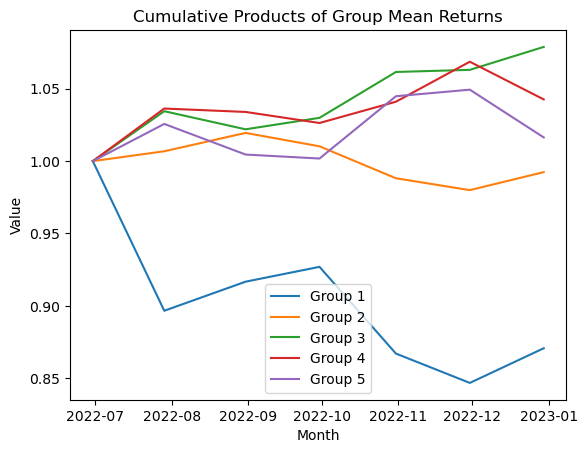

In [128]:
dates = ['2022-06-30','2022-07-29', '2022-08-31',
       '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-30']

# Convert dates from strings to datetime objects
dates = [datetime.strptime(date, '%Y-%m-%d') for date in dates]

for i, result in enumerate(all_results):
    plt.plot(dates, result, label=f'Group {i+1}')
plt.xlabel('Month')  # Replace 'Index' with a suitable label
plt.ylabel('Value')  # Replace 'Value' with a suitable label
plt.title('Cumulative Products of Group Mean Returns')  # Customize title as per your needs
plt.legend()  # This will add a legend with labels as 'Group 1', 'Group 2', etc.
plt.legend()
plt.show()
total_results.append(all_results)

In [129]:
total_returns.append(returns)

In [130]:
all_list=total_results

In [131]:
group1=[]
group2=[]
group3=[]
group4=[]
group5=[]

for i in range(len(all_list)):
    for j in range(len(all_list[i])):
        if j==0:
            group1.append(all_list[i][j])
        if j==1:
            group2.append(all_list[i][j])
        if j==2:
            group3.append(all_list[i][j])
        if j==3:
            group4.append(all_list[i][j])
        if j==4:
            group5.append(all_list[i][j])

In [132]:
for i in range(len(group1)):
    if i > 0:
        group1[i] = group1[i][1:]
for i in range(len(group2)):
    if i > 0:
        group2[i] = group2[i][1:]
for i in range(len(group3)):
    if i > 0:
        group3[i] = group3[i][1:]
for i in range(len(group4)):
    if i > 0:
        group4[i] = group4[i][1:]
for i in range(len(group5)):
    if i > 0:
        group5[i] = group5[i][1:]

In [133]:
all_returns=total_returns

In [134]:
len(all_returns)

12

In [135]:
all_returns[0][0]

[0,
 1.057117256514145,
 0.9473843931370187,
 0.9212672244310955,
 0.9059758572953456,
 1.0822122371717449,
 1.0740006047967388]

In [136]:
rgroup1=[]
rgroup2=[]
rgroup3=[]
rgroup4=[]
rgroup5=[]
for i in range(len(all_returns)):
    for j in range(len(all_returns[i])):
        if j==0:
            rgroup1.append(all_returns[i][j])
        if j==1:
            rgroup2.append(all_returns[i][j])
        if j==2:
            rgroup3.append(all_returns[i][j])
        if j==3:
            rgroup4.append(all_returns[i][j])
        if j==4:
            rgroup5.append(all_returns[i][j])

In [137]:
for i in range(len(rgroup1)):
    if i ==0:
        rgroup1[i][0] = 1
    if i > 0:
        rgroup1[i] = rgroup1[i][1:]
for i in range(len(rgroup2)):
    if i ==0:
        rgroup2[i][0] = 1
    if i > 0:
        rgroup2[i] = rgroup2[i][1:]
for i in range(len(rgroup3)):
    if i ==0:
        rgroup3[i][0] = 1
    if i > 0:
        rgroup3[i] = rgroup3[i][1:]
for i in range(len(rgroup4)):
    if i ==0:
        rgroup4[i][0] = 1
    if i > 0:
        rgroup4[i] = rgroup4[i][1:]
for i in range(len(rgroup5)):
    if i ==0:
        rgroup5[i][0] = 1
    if i > 0:
        rgroup5[i] = rgroup5[i][1:]

In [138]:
bsdf=df[(df['date'] >= '2017-01-26') & (df['date'] <= '2023-01-31')]

grouped = bsdf.groupby('date')

zzz=1
baseline_returns=[]
for name, group in grouped:
    dataframes[name] = group
    zzz=zzz+1
    baseline_returns.append(1-group['return_next_month'].mean())

grouped_mean_returns = {}

for key, value in grouped_lists.items():

    mean_returns = [df['return_next_month'].mean() for df in value if not df.empty]  # 排除空的DataFrame
    
    grouped_mean_returns[key] = mean_returns

all_results = []
returns = []

for key, value in grouped_mean_returns.items():
    result = [1]
    group_rt = [0]
    
    for j, baseline in zip(value, baseline_returns):
        result.append(result[-1] * (j + baseline))
        group_rt.append(j) 
    
    all_results.append(result)
    returns.append(group_rt)

In [139]:
rt_group1=[]
rt_group2=[]
rt_group3=[]
rt_group4=[]
rt_group5=[]
c=0
for i in range(len(rgroup1)):
    for j in range(len(rgroup1[i])):
        rt_group1.append(c)
        c=rgroup1[i][j]
c=0
for i in range(len(rgroup2)):
    for j in range(len(rgroup2[i])):
        rt_group2.append(c)
        c=rgroup2[i][j]
c=0
for i in range(len(rgroup3)):
    for j in range(len(rgroup3[i])):
        rt_group3.append(c)
        c=rgroup3[i][j]
c=0
for i in range(len(rgroup4)):
    for j in range(len(rgroup4[i])):
        rt_group4.append(c)
        c=rgroup4[i][j]
c=0
for i in range(len(rgroup5)):
    for j in range(len(rgroup5[i])):
        rt_group5.append(c)
        c=rgroup5[i][j]

In [140]:
rt_group5 = rt_group5[1:]
rt_group4 = rt_group4[1:]
rt_group3 = rt_group3[1:]
rt_group2 = rt_group2[1:]
rt_group1 = rt_group1[1:]

In [141]:
adjed_g1=[]
for i in range(len(rt_group1)):
    adjed_g1.append(rt_group1[i])
    if i >0:
        adjed_g1.append(rt_group1[i]+baseline_returns[i+1])
adjed_g2=[]
for i in range(len(rt_group2)):
    adjed_g2.append(rt_group2[i])
    if i >0:
        adjed_g2.append(rt_group2[i]+baseline_returns[i+1])
adjed_g3=[]
for i in range(len(rt_group3)):
    adjed_g3.append(rt_group3[i])
    if i >0:
        adjed_g3.append(rt_group3[i]+baseline_returns[i+1])
adjed_g4=[]
for i in range(len(rt_group4)):
    adjed_g4.append(rt_group4[i])
    if i >0:
        adjed_g4.append(rt_group4[i]+baseline_returns[i+1])
adjed_g5=[]
for i in range(len(rt_group5)):
    adjed_g5.append(rt_group5[i])
    if i >0:
        adjed_g5.append(rt_group5[i]+baseline_returns[i+1])
adjed_g6=[]
for i in range(len(rt_group5)):
    adjed_g6.append(rt_group5[i])
    if i >0:
        adjed_g6.append((1+(rt_group5[i]-1)-(rt_group1[i]-1))+baseline_returns[i+1])

In [142]:
a=1
return_g1=[]
for i in range(len(adjed_g1)):
    a=adjed_g1[i]*a
    return_g1.append(a)
a=1
return_g2=[]
for i in range(len(adjed_g2)):
    a=adjed_g2[i]*a
    return_g2.append(a)
a=1
return_g3=[]
for i in range(len(adjed_g3)):
    a=adjed_g3[i]*a
    return_g3.append(a)
a=1
return_g4=[]
for i in range(len(adjed_g4)):
    a=adjed_g4[i]*a
    return_g4.append(a)
a=1
return_g5=[]
for i in range(len(adjed_g5)):
    a=adjed_g5[i]*a
    return_g5.append(a)
a=1
return_g6=[]
for i in range(len(adjed_g6)):
    a=adjed_g6[i]*a
    return_g6.append(a)

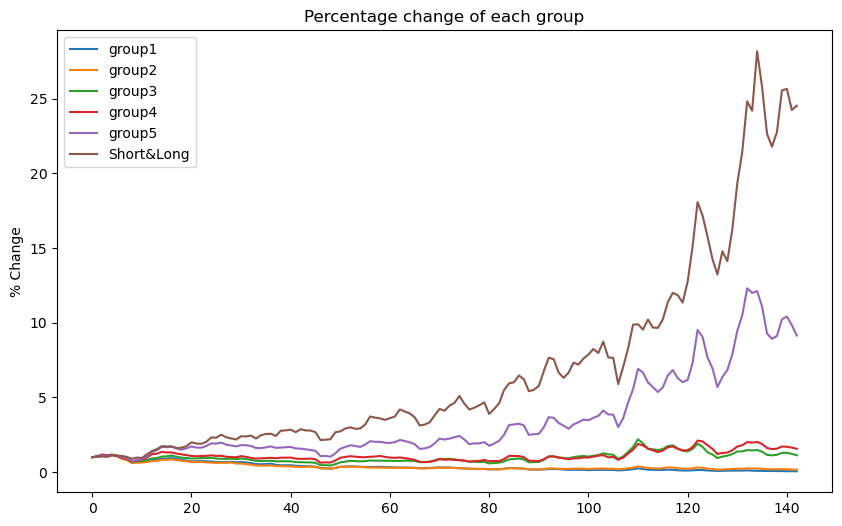

In [143]:
plt.figure(figsize=(10, 6))
plt.plot(return_g1, label='group1')
plt.plot(return_g2, label='group2')
plt.plot(return_g3, label='group3')
plt.plot(return_g4, label='group4')
plt.plot(return_g5, label='group5')
plt.plot(return_g6, label='Short&Long')
plt.ylabel('% Change')
plt.title('Percentage change of each group')
plt.legend()

In [144]:
count_g1=0
for i in adjed_g1:
    if i-1>0:
        count_g1=count_g1+1
count_g2=0
for i in adjed_g2:
    if i-1>0:
        count_g2=count_g2+1
count_g3=0
for i in adjed_g3:
    if i-1>0:
        count_g3=count_g3+1
count_g4=0
for i in adjed_g4:
    if i-1>0:
        count_g4=count_g4+1
count_g5=0
for i in adjed_g5:
    if i-1>0:
        count_g5=count_g5+1
count_gsl=0
for i in range(len(adjed_g5)):
    if adjed_g5[i]-adjed_g1[i]>0:
        count_gsl=count_gsl+1

In [145]:
sl1=count_g1/len(adjed_g1)
sl2=count_g2/len(adjed_g1)
sl3=count_g3/len(adjed_g1)
sl4=count_g4/len(adjed_g1)
sl5=count_g5/len(adjed_g1)
sl6=count_gsl/len(adjed_g1)

In [146]:
root=1/12
mroot=1/142

In [147]:
adjed_gg1 = [i-1 for i in adjed_g1]
adjed_gg2 = [i-1 for i in adjed_g2]
adjed_gg3 = [i-1 for i in adjed_g3]
adjed_gg4 = [i-1 for i in adjed_g4]
adjed_gg5 = [i-1 for i in adjed_g5]
adjed_gg6 = [i-1 for i in adjed_g6]

In [148]:
np_std_g1 = np.std(adjed_gg1)
np_std_g2 = np.std(adjed_gg2)
np_std_g3 = np.std(adjed_gg3)
np_std_g4 = np.std(adjed_gg4)
np_std_g5 = np.std(adjed_gg5)
np_std_g6 = np.std(adjed_gg6)

In [149]:
ylrtg1=math.pow(return_g1[142],root)
ylrtg2=math.pow(return_g2[142],root)
ylrtg3=math.pow(return_g3[142],root)
ylrtg4=math.pow(return_g4[142],root)
ylrtg5=math.pow(return_g5[142],root)
ylrtg6=math.pow(return_g6[142],root)

In [150]:
mlrtg1=math.pow(return_g1[142],mroot)
mlrtg2=math.pow(return_g2[142],mroot)
mlrtg3=math.pow(return_g3[142],mroot)
mlrtg4=math.pow(return_g4[142],mroot)
mlrtg5=math.pow(return_g5[142],mroot)
mlrtg6=math.pow(return_g6[142],mroot)

In [151]:
g1_sharpe=(ylrtg1-1)/(np_std_g1*sqrt(12))
g2_sharpe=(ylrtg2-1)/(np_std_g2*sqrt(12))
g3_sharpe=(ylrtg3-1)/(np_std_g3*sqrt(12))
g4_sharpe=(ylrtg4-1)/(np_std_g4*sqrt(12))
g5_sharpe=(ylrtg5-1)/(np_std_g5*sqrt(12))
g6_sharpe=(ylrtg6-1)/(np_std_g6*sqrt(12))

In [152]:
subsequences_less_than_one = [list(group) for key, group in groupby(adjed_g1, lambda x: x < 1) if key]

products = [product_of_list(subseq) for subseq in subsequences_less_than_one]

min_productg1 = min(products)

subsequences_less_than_one = [list(group) for key, group in groupby(adjed_g2, lambda x: x < 1) if key]

products = [product_of_list(subseq) for subseq in subsequences_less_than_one]

min_productg2 = min(products)

subsequences_less_than_one = [list(group) for key, group in groupby(adjed_g3, lambda x: x < 1) if key]

products = [product_of_list(subseq) for subseq in subsequences_less_than_one]

min_productg3 = min(products)

subsequences_less_than_one = [list(group) for key, group in groupby(adjed_g4, lambda x: x < 1) if key]

products = [product_of_list(subseq) for subseq in subsequences_less_than_one]

min_productg4 = min(products)

subsequences_less_than_one = [list(group) for key, group in groupby(adjed_g5, lambda x: x < 1) if key]

products = [product_of_list(subseq) for subseq in subsequences_less_than_one]

min_productg5 = min(products)

subsequences_less_than_one = [list(group) for key, group in groupby(adjed_g6, lambda x: x < 1) if key]

products = [product_of_list(subseq) for subseq in subsequences_less_than_one]

min_productg6 = min(products)

In [196]:
print("Group1 biggest drop:",(1-min_productg1)*100,"%")
print("Group2 biggest drop:",(1-min_productg2)*100,"%")
print("Group3 biggest drop:",(1-min_productg3)*100,"%")
print("Group4 biggest drop:",(1-min_productg4)*100,"%")
print("Group5 biggest drop:",(1-min_productg5)*100,"%")
print("short long biggest drop：",(1-min_productg6)*100,"%")

Group1 biggest drop: 50.67238781154912 %
Group2 biggest drop: 47.78040945163724 %
Group3 biggest drop: 50.530189207993814 %
Group4 biggest drop: 42.58625977633993 %
Group5 biggest drop: 40.24289941790137 %
short long biggest drop： 32.51260891488543 %


In [197]:
print("Group1 annual sigma：",np_std_g1*sqrt(12)*100,"%")
print("Group2 annual sigma：",np_std_g2*sqrt(12)*100,"%")
print("Group3 annual sigma：",np_std_g3*sqrt(12)*100,"%")
print("Group4 annual sigma：",np_std_g4*sqrt(12)*100,"%")
print("Group5 annual sigma：",np_std_g5*sqrt(12)*100,"%")
print("short long annual sigma：",np_std_g6*sqrt(12)*100,"%")

Group1 annual sigma： 34.59283337427553 %
Group2 annual sigma： 32.8155694266108 %
Group3 annual sigma： 34.456873161006634 %
Group4 annual sigma： 34.16646435901396 %
Group5 annual sigma： 36.563485539923896 %
short long annual sigma： 31.219860956030637 %


In [198]:
print("Group1 annual return：",ylrtg1*100-100,"%")
print("Group2 annual return：",ylrtg2*100-100,"%")
print("Group3 annual return：",ylrtg3*100-100,"%")
print("Group4 annual return：",ylrtg4*100-100,"%")
print("Group5 annual return：",ylrtg5*100-100,"%")
print("short long annual return：",ylrtg6*100-100,"%")

Group1 annual return： -21.463246501355854 %
Group2 annual return： -13.992044777555265 %
Group3 annual return： 1.013550732183674 %
Group4 annual return： 3.780814368146679 %
Group5 annual return： 20.254675610700616 %
short long annual return： 30.56390393536455 %


In [199]:
print("Group1 Sharpe Ratio：",g1_sharpe)
print("Group2 Sharpe Ratio：",g2_sharpe)
print("Group3 Sharpe Ratio：",g3_sharpe)
print("Group4 Sharpe Ratio：",g4_sharpe)
print("Group5 Sharpe Ratio：",g5_sharpe)
print("short long Sharpe Ratio：",g6_sharpe)

Group1 Sharpe Ratio： -0.6204535566409168
Group2 Sharpe Ratio： -0.42638433591247815
Group3 Sharpe Ratio： 0.02941505247581979
Group4 Sharpe Ratio： 0.11065863673860671
Group5 Sharpe Ratio： 0.5539591018636453
short long Sharpe Ratio： 0.9789891113996335
